In [0]:
import numpy as np
from scipy.stats import mode
from sklearn.datasets import load_iris, load_digits
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import tree

# Task 1 [1p]

a) Napisz własny klasyfikator K-Nearest Neighbours (KNN). Zadanie można wykonać w Matlabie,
Pythonie lub innym języku programowania. W zadaniu można użyć wcześniej zaimplementowanej
funkcji liczenia odległości (na przykład z zadania 0 z listy 3).


b) Napisany klasyfikator KNN przetestuj na danych IRIS. Podziel dane losowo na dwie części: 100
wektorów danych użyj jako dane uczące do stworzenia klasyfikatora i 50 wektorów danych użyj
jako dane testowe do przetestowania stworzonego klasyfikatora. Powtórz ten eksperyment
kilkukrotnie i porównaj wyniki.


c) Przeprowadź też podobny test klasyfikatora KNN na danych Optical Recognition of Handwritten
Digits (https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).


d) Zrób cross validation klasyfikatora KNN na obu zestawach danych: podziel dane na 10 części,
kolejno bierz jedną z nich, traktuj ją jako dane testowe, a pozostałe 9 części jako dane uczące,
stwórz klasyfikator na danych uczących i przetestuj na danych testowych, odnotuj liczbę błędów,
powtórz obliczenia dla kolejnych części danych, policz całkowity błąd klasyfikatora sumując
odnotowane liczby błędów. 


## a
Napisz własny klasyfikator K-Nearest Neighbours (KNN). Zadanie można wykonać w Matlabie, Pythonie lub innym języku programowania. W zadaniu można użyć wcześniej zaimplementowanej funkcji liczenia odległości (na przykład z zadania 0 z listy 3).

In [0]:
# returns numpy array of test labels according to knn algorithm
def k_neareast_neighbours(train_set,train_labels,test_set,k,debug=False):
    
    distance_matrix = (-2 * np.dot(test_set,train_set.T) + np.sum(train_set**2,    axis=1) + np.sum(test_set**2, axis=1)[:, np.newaxis]).T
    
    distance_sort_args = np.argpartition(distance_matrix, k, axis = 0)
    #distance_sort_args = np.argsort(distance_matrix,axis=0)
    nearest_classes = train_labels[distance_sort_args]
    k_nearest_classes = nearest_classes.T[:,:k]
    result_mode = mode(k_nearest_classes,axis=1)
    
    if debug:
        print("distance_sort_args =",distance_sort_args,
             "\n nearest_classes =", nearest_classes,
             "\n k_nearest_classes =", k_nearest_classes,
             "\n result mode =", result_mode)
    return result_mode[0].flatten()


## b
 Napisany klasyfikator KNN przetestuj na danych IRIS. Podziel dane losowo na dwie części: 100 wektorów danych użyj jako dane uczące do stworzenia klasyfikatora i 50 wektorów danych użyj jako dane testowe do przetestowania stworzonego klasyfikatora. Powtórz ten eksperyment kilkukrotnie i porównaj wyniki.

In [0]:

def task1b(k,train_ctn, test_ctn, data, debug = False):    
    random_permutation = np.random.permutation(data.target.shape[0])
    
    train_knn = data.data[random_permutation[:train_ctn]]
    train_knn_labels = data.target[random_permutation[:train_ctn]]
    
    test_knn = data.data[random_permutation[train_ctn:]]
    test_knn_labels = data.target[random_permutation[train_ctn:]]
    
    k_nn_result = k_neareast_neighbours(train_knn,train_knn_labels,test_knn,k)
    error = np.sum(k_nn_result != test_knn_labels)
    if debug:
        print "With k = ",k," number of mislabeled exaples is", error, " which gives error rate equal", 1.*error/test_ctn
    return error

In [0]:
def taks1b_multiple_k(k_arr,train_ctn, test_ctn, data,repetitions=1,debug=False):
    benchmark_knn_results = np.zeros((k_arr.shape[0],repetitions))
    for i,k in enumerate(k_arr):
        if debug:
            print "Doing knn classification for k =",k," ",repetitions,"time/s"
        for repetition in range(repetitions):            
            benchmark_knn_results[i][repetition] = task1b(k,train_ctn, test_ctn, data,debug)
    return benchmark_knn_results,k_arr

In [0]:
def plot_task1(results,k_arr, test_ctn):
    mean_benchmark = 100. * results.mean(axis=1) / test_ctn

    plt.figure(figsize=(10,10))
    plt.plot(k_arr,mean_benchmark,marker='o')
    plt.xlabel('K')
    plt.ylabel('avg calssification error (%)')
    plt.show()

In [0]:
data = load_iris()
results = taks1b_multiple_k(np.arange(1,20,2),100,50,data,500)

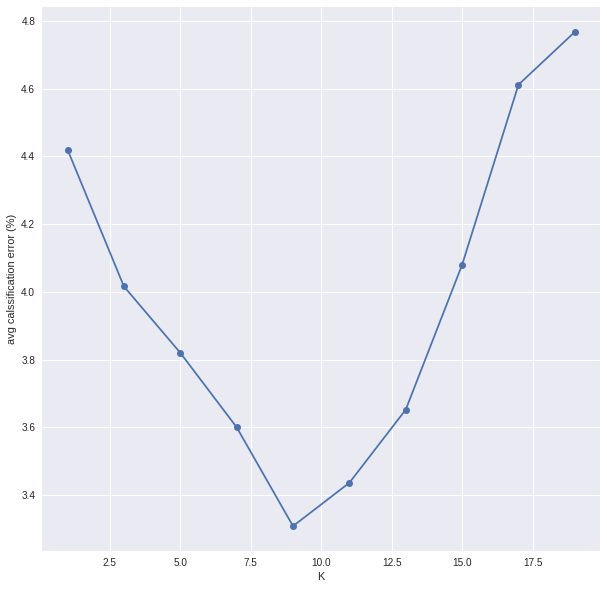

In [0]:
plot_task1(results[0],results[1],50)

In [0]:
print results[0][0]

[3. 1. 0. 1. 2. 3. 1. 3. 4. 0. 3. 3. 1. 2. 3. 1. 2. 3. 3. 2. 4. 3. 3. 3.
 3. 3. 2. 2. 2. 1. 0. 0. 3. 1. 2. 3. 3. 2. 2. 0. 2. 2. 2. 1. 2. 2. 4. 2.
 1. 1. 2. 1. 2. 2. 3. 3. 2. 1. 0. 1. 3. 2. 3. 2. 1. 2. 2. 5. 4. 1. 4. 3.
 2. 2. 4. 0. 3. 1. 1. 1. 1. 5. 2. 3. 3. 2. 1. 2. 0. 3. 3. 4. 2. 4. 3. 2.
 2. 1. 4. 1. 3. 3. 2. 3. 1. 3. 2. 3. 4. 1. 4. 2. 2. 2. 3. 2. 3. 4. 3. 3.
 3. 1. 2. 3. 2. 4. 2. 2. 0. 6. 1. 1. 3. 3. 3. 3. 4. 1. 4. 0. 2. 2. 3. 2.
 1. 2. 0. 2. 1. 2. 5. 2. 1. 3. 2. 3. 2. 2. 2. 1. 2. 1. 1. 3. 0. 2. 2. 4.
 2. 2. 1. 1. 1. 2. 1. 1. 3. 1. 2. 3. 1. 4. 1. 3. 4. 3. 5. 2. 0. 5. 2. 2.
 2. 1. 4. 3. 3. 4. 2. 3. 0. 1. 4. 2. 2. 2. 3. 3. 1. 0. 3. 1. 2. 1. 2. 0.
 2. 3. 2. 2. 2. 2. 4. 2. 2. 1. 2. 4. 3. 1. 1. 1. 2. 1. 5. 5. 4. 2. 2. 3.
 2. 1. 2. 1. 2. 1. 3. 1. 2. 3. 2. 2. 3. 3. 2. 3. 2. 3. 3. 3. 1. 1. 5. 2.
 4. 0. 3. 1. 4. 3. 2. 1. 2. 2. 2. 2. 3. 2. 2. 2. 1. 4. 2. 3. 6. 5. 2. 3.
 2. 3. 3. 3. 1. 4. 0. 2. 0. 2. 2. 0. 2. 2. 1. 2. 0. 3. 3. 2. 3. 2. 2. 2.
 2. 1. 1. 4. 1. 3. 1. 4. 3. 2. 4. 2. 2. 2. 1. 2. 2.

## c

c) Przeprowadź też podobny test klasyfikatora KNN na danych Optical Recognition of Handwritten
Digits (https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).



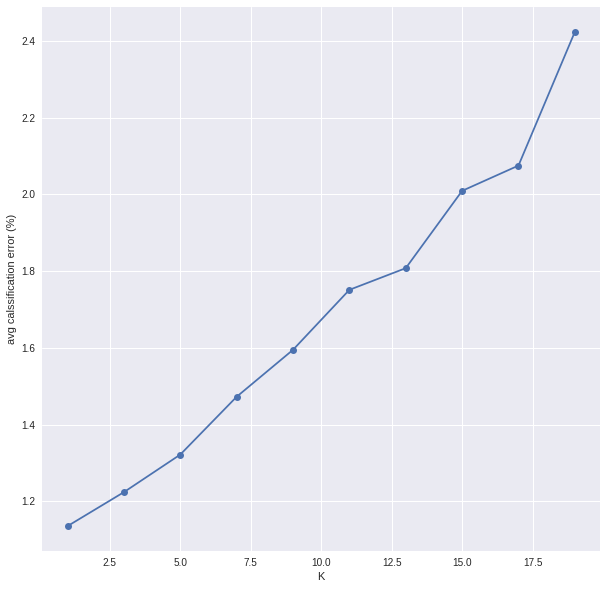

In [0]:
data_digits = load_digits()
results_digits = taks1b_multiple_k(np.arange(1,20,2),1620,177,data_digits,300)
plot_task1(results_digits[0],results_digits[1],177)

In [0]:
results_digits[0][1]

array([12., 14., 11., 12., 11., 14., 12., 12., 13., 15., 13., 12., 14.,
       11., 13., 12., 12., 15., 14., 13., 13., 12., 12., 11., 15., 11.,
       12., 12., 14., 12., 13., 15., 12., 13., 11., 12., 15., 11., 10.,
       15., 15., 12., 12., 11., 14., 14., 13., 11., 12., 13., 11., 14.,
        9., 13., 11., 12., 11., 12., 13., 14., 12., 12., 13., 12., 12.,
       15., 10., 15., 11., 12., 13., 15., 17., 14., 12., 12., 12.,  9.,
       13., 12., 12., 14., 12., 10., 14., 12., 10., 13., 15., 14., 12.,
       10., 10., 13., 13., 10., 12., 12., 10., 12., 14., 12., 13., 18.,
       11., 12., 14., 11., 13., 13., 13., 14., 12., 12., 15., 13., 11.,
       12., 12., 12., 12., 12., 11., 12., 12., 13., 13., 13., 12., 12.,
       12., 12., 16., 11., 11., 13., 11., 13., 12., 14., 12., 13., 13.,
       13., 13., 12., 14., 13., 10., 14., 13., 12., 11., 11., 13., 15.,
       11., 12., 13., 14., 13., 14., 13., 10., 13., 11., 14., 13., 13.,
       13., 14., 12., 11., 14., 14., 12., 13., 16., 10.,  9., 12

## d


d) Zrób cross validation klasyfikatora KNN na obu zestawach danych: podziel dane na 10 części,
kolejno bierz jedną z nich, traktuj ją jako dane testowe, a pozostałe 9 części jako dane uczące,
stwórz klasyfikator na danych uczących i przetestuj na danych testowych, odnotuj liczbę błędów,
powtórz obliczenia dla kolejnych części danych, policz całkowity błąd klasyfikatora sumując
odnotowane liczby błędów. 

In [0]:
def cross_validation(k,data,parts):
    random_permutation = np.random.permutation(data.target.shape[0])
    sum_of_errors = 0
    interval = data.target.shape[0]/parts
    for rep in range(parts):
        train_mask = np.ones(data.target.shape[0],dtype='bool')
        train_mask[rep*interval:(rep+1)*interval] = False
        
        train_knn = data.data[random_permutation][train_mask]
        train_knn_labels = data.target[random_permutation][train_mask]
        test_knn = data.data[random_permutation][rep*interval:(rep+1)*interval]
        test_knn_labels = data.target[random_permutation][rep*interval:(rep+1)*interval]
        
        k_nn_result = k_neareast_neighbours(train_knn,train_knn_labels,test_knn,k)
        error = np.sum(k_nn_result != test_knn_labels)
        print 'Training using data from',rep*interval,' to',(rep+1)*interval,'as a test set, yields',error, 'error'
        sum_of_errors += error
    mean_error = 1.*sum_of_errors/parts
    print ' Total error sum', sum_of_errors, 'mean of errors per batch',mean_error
    return sum_of_errors, sum_of_errors/parts

In [0]:
data_iris = load_iris()
cross_validation(1,data_iris,10)

Training using data from 0  to 15 as a test set, yields 1 error
Training using data from 15  to 30 as a test set, yields 0 error
Training using data from 30  to 45 as a test set, yields 0 error
Training using data from 45  to 60 as a test set, yields 0 error
Training using data from 60  to 75 as a test set, yields 1 error
Training using data from 75  to 90 as a test set, yields 2 error
Training using data from 90  to 105 as a test set, yields 0 error
Training using data from 105  to 120 as a test set, yields 0 error
Training using data from 120  to 135 as a test set, yields 1 error
Training using data from 135  to 150 as a test set, yields 1 error
 Total error sum 6 mean of errors per batch 0.6


(6, 0)

In [0]:
data_digits = load_digits()
cross_validation(3,data_digits,10)

Training using data from 0  to 179 as a test set, yields 3 error
Training using data from 179  to 358 as a test set, yields 1 error
Training using data from 358  to 537 as a test set, yields 2 error
Training using data from 537  to 716 as a test set, yields 5 error
Training using data from 716  to 895 as a test set, yields 2 error
Training using data from 895  to 1074 as a test set, yields 3 error
Training using data from 1074  to 1253 as a test set, yields 2 error
Training using data from 1253  to 1432 as a test set, yields 4 error
Training using data from 1432  to 1611 as a test set, yields 1 error
Training using data from 1611  to 1790 as a test set, yields 3 error
 Total error sum 26 mean of errors per batch 2.6


(26, 2)

In [0]:
task1b(3,1611, 1797-1611, data_digits, debug = True)

With k =  3  number of mislabeled exaples is 3  which gives error rate equal 0.0161290322581


3

# Task 2 [1p]
W pakiecie SciKit do Pythona dostępnych jest kilka popularnych algorytmów klasyfikacji danych
przy użyciu drzew klasyfikacyjnych. Zapoznaj się z nimi wykonując skrypt umieszczony w
materiałach do wykładu. Do rysowania drzew użyj programu Graphviz.


a) Jaką miarę różnorodności stosuje algorytm konstrukcji drzew klasyfikujących użyty w skrypcie?
Dla danych Titanic sporządź drzewa klasyfikacyjne stosując indeks Giniego oraz entropię.


b) Podziel dane Titanic na dane uczące i dane testowe (jak w zadaniu 1b), stwórz drzewa
klasyfikacyjne na danych uczących i przetestuj na danych testowych.


c) Spróbuj ograniczyć głębokość drzewa. Zobacz jak wpływa to na wyniki (zarówno na danych
uczących jak i na danych testowych).


d) Spróbuj przyciąć drzewo techniką omawianą na wykładzie lub własną. Zobacz jak wpływa to na
wyniki (zarówno na danych uczących jak i na danych testowych).


e) Zrób cross validation wszystkich tworzonych w tym zadaniu klasyfikatorów na zestawie danych
Titanic. 


## Wprowadzenie
Skrypt pokazuje jak użyć pakietu SciKit do klasyfikacji danych. Rozważane są dwa przykłady:  zestaw danych IRIS oraz zestaw danych TITANIC  (do ściągnięcia z https://www.kaggle.com/c/titanic, dokładniej: potrzebny jest  plik https://www.kaggle.com/c/titanic/download/train.csv).

https://www.kaggle.com/c/titanic/download/test.csv

In [0]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import tree

## 1. Pierwszy zestaw danych
Dane IRIS

In [0]:
# wczytanie zestawu danych
from sklearn import datasets
iris = datasets.load_iris()

data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
# rozbicie zestawu danych na dane opisujące kwiat (X) i etykietę klasy (y)
y = data['species']
X = data.drop('species', axis = 1)

# stworzenie drzewa klasyfikacyjnego
t = tree.DecisionTreeClassifier()
t = t.fit(X, y)

In [0]:
# zapisanie drzewa klasyfikacyjnego do pliku .dot
# plik ten można przekształcić do pliku .pdf za pomocą programu graphviz używając polecenia:
#   dot -Tpdf iris.dot -o iris.pdf

with open("bank.dot", "w") as f:
    tree.export_graphviz(t, out_file=f, feature_names=["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome"])

In [0]:

# ocena stworzonego klasyfikatora na danych uczących
t.score(X, y)

1.0

In [0]:
ls

'D:\iris.dot'   ris.dot   sample_data/


In [0]:
!pip install imageio
import imageio

In [0]:
from google.colab import files
files.download('bank.dot')
#http://webgraphviz.com/
#files.upload()
#image = imageio.imread('iris.PNG')
#plt.figure(figsize=(14,14))
#plt.imshow(image)

In [0]:
files.upload()

Saving bank.csv to bank.csv


{u'bank.csv': '30;"unemployed";"married";"primary";"no";1787;"no";"no";"cellular";19;"oct";79;1;-1;0;"unknown";"no"\n33;"services";"married";"secondary";"no";4789;"yes";"yes";"cellular";11;"may";220;1;339;4;"failure";"no"\n35;"management";"single";"tertiary";"no";1350;"yes";"no";"cellular";16;"apr";185;1;330;1;"failure";"no"\n30;"management";"married";"tertiary";"no";1476;"yes";"yes";"unknown";3;"jun";199;4;-1;0;"unknown";"no"\n59;"blue-collar";"married";"secondary";"no";0;"yes";"no";"unknown";5;"may";226;1;-1;0;"unknown";"no"\n35;"management";"single";"tertiary";"no";747;"no";"no";"cellular";23;"feb";141;2;176;3;"failure";"no"\n36;"self-employed";"married";"tertiary";"no";307;"yes";"no";"cellular";14;"may";341;1;330;2;"other";"no"\n39;"technician";"married";"secondary";"no";147;"yes";"no";"cellular";6;"may";151;2;-1;0;"unknown";"no"\n41;"entrepreneur";"married";"tertiary";"no";221;"yes";"no";"unknown";14;"may";57;2;-1;0;"unknown";"no"\n43;"services";"married";"primary";"no";-88;"yes";

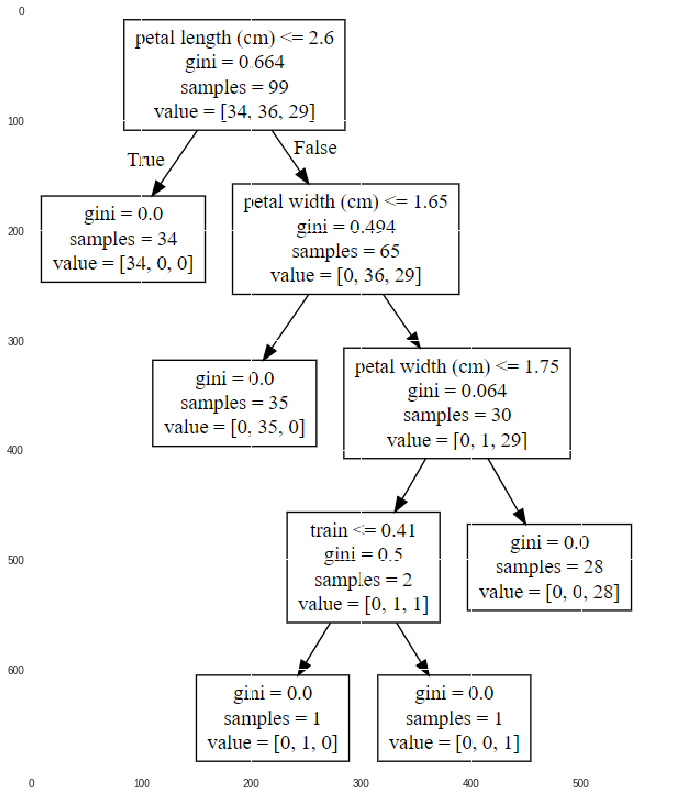

In [0]:
image = imageio.imread('iris.PNG')
plt.figure(figsize=(14,14))
plt.imshow(image)

In [0]:
# Uczciwiej byłoby oceniać klasyfikator na danych, które nie były używane podczas tworzenia
# klasyfikatora. Dlatego cały zestaw danych warto podzielić na dwie części: dane uczące i dane
# testowe.

data['train'] = np.random.uniform(0, 1, len(data))

data_train = data[data['train'] <= 0.65]
data_test = data[data['train'] > 0.65]

y = data_train['species']
X = data_train.drop('species', axis = 1)

t = tree.DecisionTreeClassifier()
t = t.fit(X, y)

print t.score(X, y)

y = data_test['species']
X = data_test.drop('species', axis = 1)

print t.score(X, y)

1.0
0.9354838709677419


## 2. Drugi zestaw danych
Dane TITANIC (do ściągnięcia z https://www.kaggle.com/c/titanic, dokładniej: potrzebny jest  plik https://www.kaggle.com/c/titanic/download/train.csv).

In [0]:
# wczytanie zestawu danych z pliku
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
# usunięcie z zestawu danych atrybutów nieistotnych dla klasyfikacji
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
data = data.dropna()
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [0]:
# zmiana kodowania atrybutów nominalnych w zestawie danych
data['Sex'] = pd.Categorical.from_array(data['Sex']).codes
data['Embarked'] = pd.Categorical.from_array(data['Embarked']).codes
data.head()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [0]:
# rozbicie zestawu danych na dane opisujące pasażera (X) i etykietę klasy (y)
y = data['Survived']
X = data.drop('Survived', axis = 1)

# stworzenie drzewa klasyfikacyjnego
t = tree.DecisionTreeClassifier()
t = t.fit(X, y)

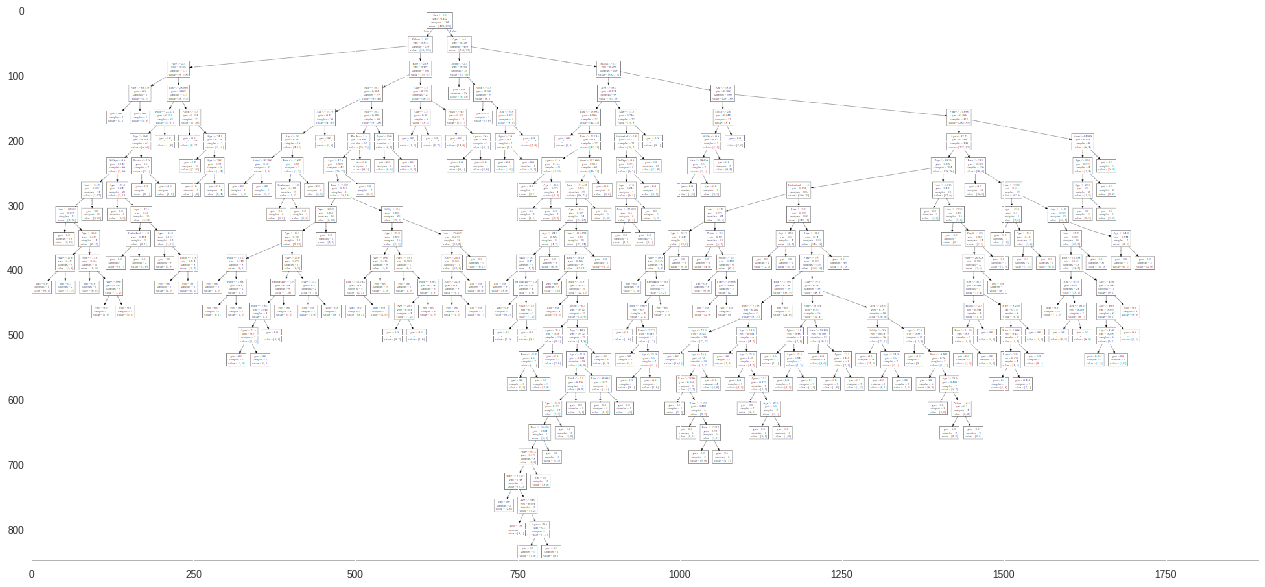

In [0]:
image = imageio.imread('titanic.PNG')
plt.figure(figsize=(22,14))
plt.imshow(image)

##Entropy


In [0]:
# rozbicie zestawu danych na dane opisujące pasażera (X) i etykietę klasy (y)
y = data['Survived']
X = data.drop('Survived', axis = 1)

# stworzenie drzewa klasyfikacyjnego
t = tree.DecisionTreeClassifier("entropy")
t = t.fit(X, y)

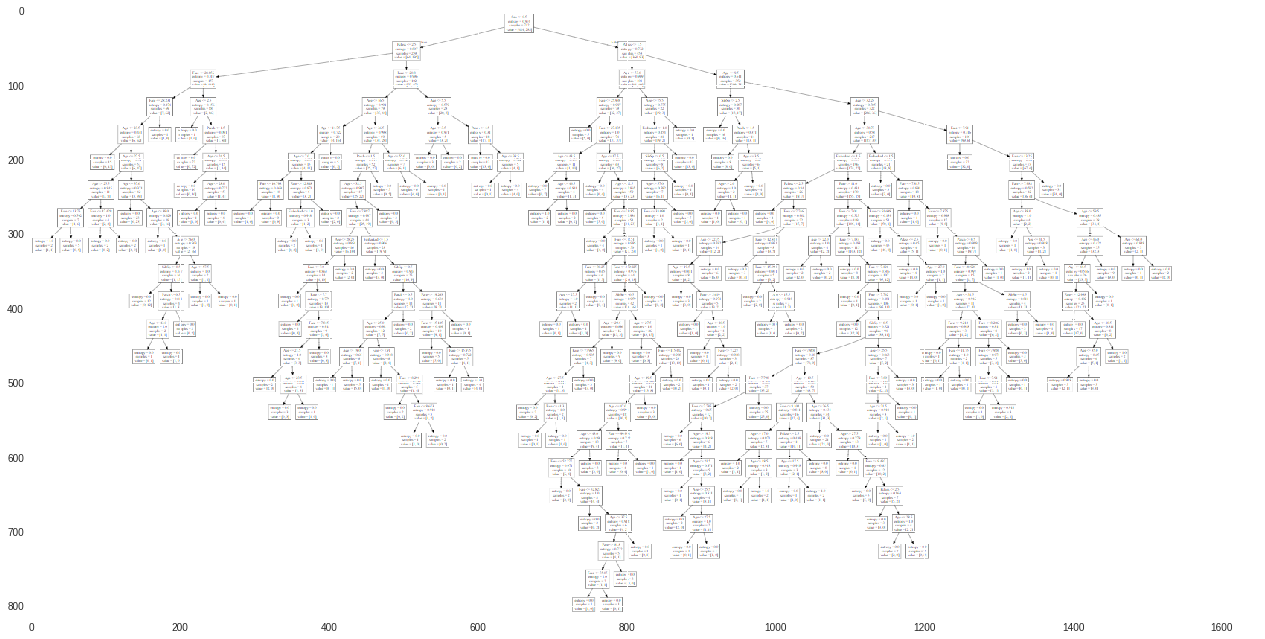

In [0]:
image = imageio.imread('titanic1.PNG')
plt.figure(figsize=(22,14))
plt.imshow(image)

In [0]:
# zapisanie drzewa klasyfikacyjnego do pliku .dot
# plik ten można przekształcić do pliku .pdf za pomocą programu graphviz używając polecenia:
#   dot -Tpdf titanic.dot -o titanic.pdf

with open("titanic.dot", "w") as f:
    tree.export_graphviz(t, out_file=f, feature_names=X.columns)

In [0]:
from google.colab import files
files.download('titanicD1.dot')
#http://webgraphviz.com/
#files.upload()
#image = imageio.imread('iris.PNG')
#plt.figure(figsize=(14,14))
#plt.imshow(image)

In [0]:
files.upload()

Saving titanicD1.PNG to titanicD1.PNG


{u'titanicD1.PNG': '\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01`\x00\x00\x00\xf8\x08\x06\x00\x00\x00\xd2#<\xd6\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00 $IDATx^\xed\x9d\xcd\xab\xecH\xdd\x80\xaf\x8a\x1f\xa3\x0e~\xa1\x0e((\xb8\x10q\xa1"\x88\xe0B\x19\xdc\t\n\x07\xaf\x7f\x85\xe2\xc2\x85/\xb8P.G\x11\\\x082\x0b\x11DT\xce\xd9\xca\xcb\xa8 \xa2\xae\xe6\\t\xa1\xbc \xa3\x0bAa\xc0\xe3BP\xdc((\xe6\xad_}$\xf5\x95t\xaa\xbb\xaa+\xdd\xfd<P\x9c\x93\xa4R\xa9$\xbfzR\xa9\xee\xa4\x1f\x0c\x00\x00\xd0\x05\x04\x0c\x00\xd0\t\x04\x0c\x00\xd0\t\x04\x0c\x00\xd0\t\x04\x0c\x00\xd0\t\x04\x0c\x00\xd0\t\x04\x0c\x00\xd0\t\x04\x0c\x00\xd0\t\x04\\\xc0s\xcf=7<\xf1\xc4\x13\xa4\x0bM\xcf?\xff\xbc\x8d\x04\x80: \xe0\x02D\xc0\xefz\xd7\xbb\x86?\xff\xf9\xcf\xa4\x0bKO=\xf5\x14\x02\x86\xea \xe0\x02\x9c\x80\xe1\xf2@\xc0\xd0\x02\x04\\\x00\x02\xbe\\\x100\xb4\x00\x01\x17\x80\x80/\x17\x04\x0c-@\xc0\x05 \xe0\xcb\x05\x

In [0]:
# ocena stworzonego klasyfikatora na danych uczących
t.score(X, y)

0.9859550561797753

In [0]:
# Uczciwiej byłoby oceniać klasyfikator na danych, które nie były używane podczas tworzenia
# klasyfikatora. Dlatego cały zestaw danych warto podzielić na dwie części: dane uczące i dane
# testowe (lista 5 zadanie 2b).

data['train'] = np.random.uniform(0, 1, len(data))

data_train = data[data['train'] <= 0.65]
data_test = data[data['train'] > 0.65]

y = data_train['Survived']
X = data_train.drop('Survived', axis = 1)


t = tree.DecisionTreeClassifier()
t = t.fit(X, y)

print t.score(X, y)
y = data_test['Survived']
X = data_test.drop('Survived', axis = 1)

print t.score(X, y)

1.0
0.8


##Entropy

In [0]:
data['train'] = np.random.uniform(0, 1, len(data))

data_train = data[data['train'] <= 0.65]
data_test = data[data['train'] > 0.65]

y = data_train['Survived']
X = data_train.drop('Survived', axis = 1)


t = tree.DecisionTreeClassifier("entropy")
t = t.fit(X, y)

print t.score(X, y)
y = data_test['Survived']
X = data_test.drop('Survived', axis = 1)

print t.score(X, y)

1.0
0.7884615384615384


## c
Spróbuj ograniczyć głębokość drzewa. Zobacz jak wpływa to na wyniki (zarówno na danych uczących jak i na danych testowych).

In [0]:
with open("titanicD1.dot", "w") as f:
    tree.export_graphviz(t, out_file=f, feature_names=X.columns)

In [0]:
data['train'] = np.random.uniform(0, 1, len(data))

data_train = data[data['train'] <= 0.65]
data_test = data[data['train'] > 0.65]

y = data_train['Survived']
X = data_train.drop('Survived', axis = 1)


t = tree.DecisionTreeClassifier(criterion="entropy",max_depth=5)
t = t.fit(X, y)

print t.score(X, y)
y = data_test['Survived']
X = data_test.drop('Survived', axis = 1)

print t.score(X, y)

0.8436123348017621
0.7790697674418605


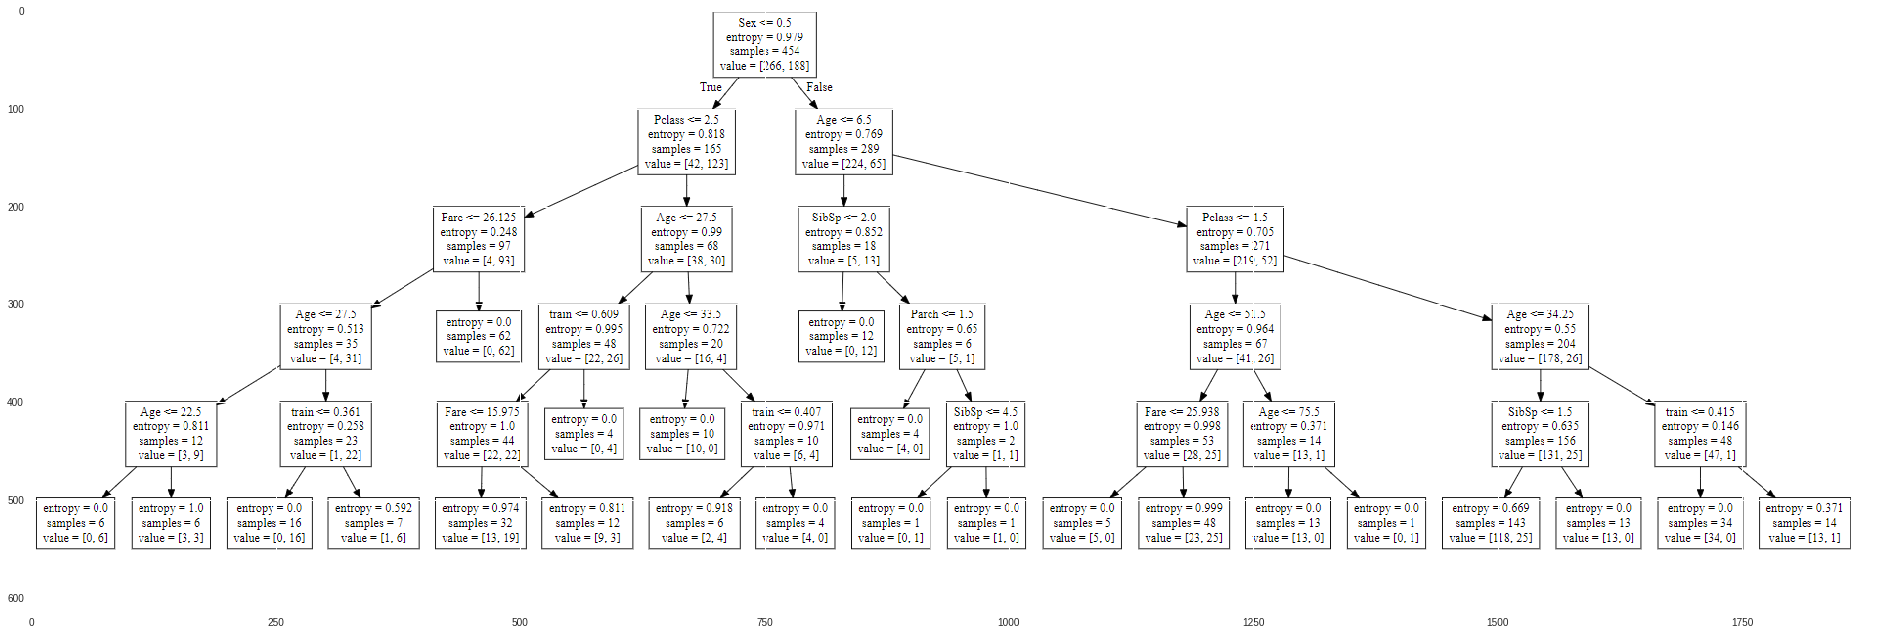

In [0]:
image = imageio.imread('train5D.PNG')
plt.figure(figsize=(33,20))
plt.imshow(image)

In [0]:
data['train'] = np.random.uniform(0, 1, len(data))

data_train = data[data['train'] <= 0.65]
data_test = data[data['train'] > 0.65]

y = data_train['Survived']
X = data_train.drop('Survived', axis = 1)


t = tree.DecisionTreeClassifier(criterion="entropy",max_depth=1)
t = t.fit(X, y)

print t.score(X, y)
y = data_test['Survived']
X = data_test.drop('Survived', axis = 1)

print t.score(X, y)

0.7775377969762419
0.7831325301204819


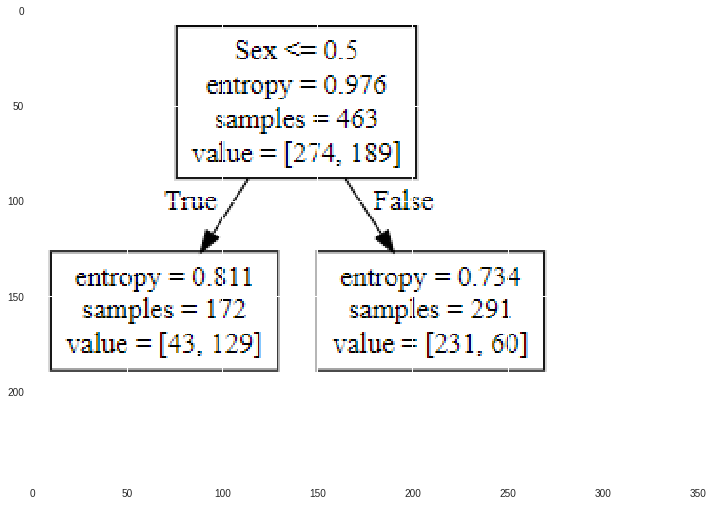

In [0]:
image = imageio.imread('titanicD1.PNG')
plt.figure(figsize=(12,12))
plt.imshow(image)

## d
d) Spróbuj przyciąć drzewo techniką omawianą na wykładzie lub własną. Zobacz jak wpływa to na wyniki (zarówno na danych uczących jak i na danych testowych).

Proste metody

* uznanie za liść węzła m jeśli |Rm| < 5
* ograniczenie głębokości drzewa
* ograniczenie liczby węzłów drzewa
 
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [0]:
data['train'] = np.random.uniform(0, 1, len(data))

data_train = data[data['train'] <= 0.65]
data_test = data[data['train'] > 0.65]

y = data_train['Survived']
X = data_train.drop('Survived', axis = 1)


t = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=5,max_leaf_nodes=5)
t = t.fit(X, y)

print t.score(X, y)
y = data_test['Survived']
X = data_test.drop('Survived', axis = 1)

print t.score(X, y)

0.8262626262626263
0.7972350230414746


## e
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

In [0]:
def crossvalclass(t,X,y):
    scores = cross_val_score(t, X, y, cv=10)
    return scores.mean()

In [0]:

y = data['Survived']
X = data.drop('Survived', axis = 1)

print "2a Basic with gini"
print crossvalclass(tree.DecisionTreeClassifier(),X,y)

print "2a Basic with entropy"
print crossvalclass(tree.DecisionTreeClassifier("entropy"),X,y)

print "2c entropy max_depth=5"
print crossvalclass(tree.DecisionTreeClassifier(criterion="entropy",max_depth=5),X,y)

print "2c entropy ,max_depth=1"
print crossvalclass(tree.DecisionTreeClassifier(criterion="entropy",max_depth=1),X,y)

print "From task 2e max_depth=5, min_samples_split=5, min_samples_leaf=5,max_leaf_nodes=5"
print crossvalclass(tree.DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=5,max_leaf_nodes=5),X,y)

2a Basic with gini
0.7390682986809747
2a Basic with entropy
0.7626380505253744
2c entropy max_depth=5
0.7895008942544154
2c entropy ,max_depth=1
0.7794047619047618
From task 2e max_depth=5, min_samples_split=5, min_samples_leaf=5,max_leaf_nodes=5
0.7922781131231835


# Task 3 [2p]

Zapoznaj się z implementacją algorytmów Random Forest i Extremely Randomized Trees w
pakiecie SciKit (http://scikit-learn.org/stable/modules/ensemble.html#forest). Użyj ich do klasyfikacji
danych IRIS oraz Titanic. Oceń ich skuteczność dzieląc dane na dwa zestawy lub robiąc cross
validation. 

In [0]:
iris = datasets.load_iris()

data_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
data_iris['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
y_iris = data['species']
X_iris = data.drop('species', axis = 1)

data_titanic = pd.read_csv("train.csv")
data_titanic = data_titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
data_titanic = data_titanic.dropna()
data_titanic['Sex'] = pd.Categorical.from_array(data_titanic['Sex']).codes
data_titanic['Embarked'] = pd.Categorical.from_array(data_titanic['Embarked']).codes
y_titanic = data_titanic['Survived']
X_titanic = data_titanic.drop('Survived', axis = 1)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  if sys.path[0] == '':


In [0]:
no_of_repetitions = 42

##Random Forest
In random forests (see RandomForestClassifier and RandomForestRegressor classes), each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set. In addition, when splitting a node during the construction of the tree, the split that is chosen is no longer the best split among all features. Instead, the split that is picked is the best split among a random subset of the features. As a result of this randomness, the bias of the forest usually slightly increases (with respect to the bias of a single non-random tree) but, due to averaging, its variance also decreases, usually more than compensating for the increase in bias, hence yielding an overall better model.

In contrast to the original publication [B2001], the scikit-learn implementation combines classifiers by averaging their probabilistic prediction, instead of letting each classifier vote for a single class.

### iris

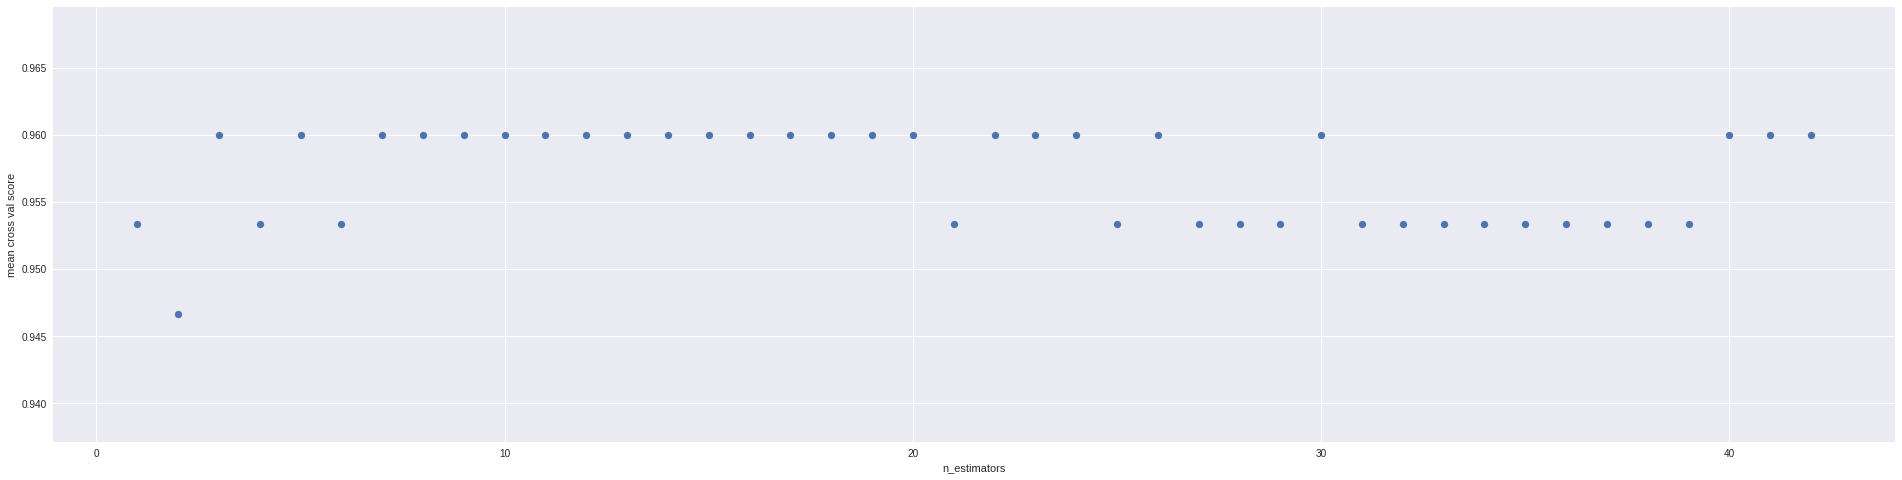

0.96 0.9466666666666667


In [0]:
scores= np.zeros(no_of_repetitions)
for i in range (no_of_repetitions):
    clf = RandomForestClassifier(n_estimators=i+1, max_depth=None,
         min_samples_split=2, random_state=0)
    score = cross_val_score(clf, X_iris, y_iris, cv=10)
    scores[i] = score.mean()
plt.figure(figsize=(33,8))
plt.scatter(np.arange(1,no_of_repetitions+1,1),scores)
plt.xlabel('n_estimators')
plt.ylabel('mean cross val score')
plt.show()
print np.max(scores), np.min(scores)

### titanic


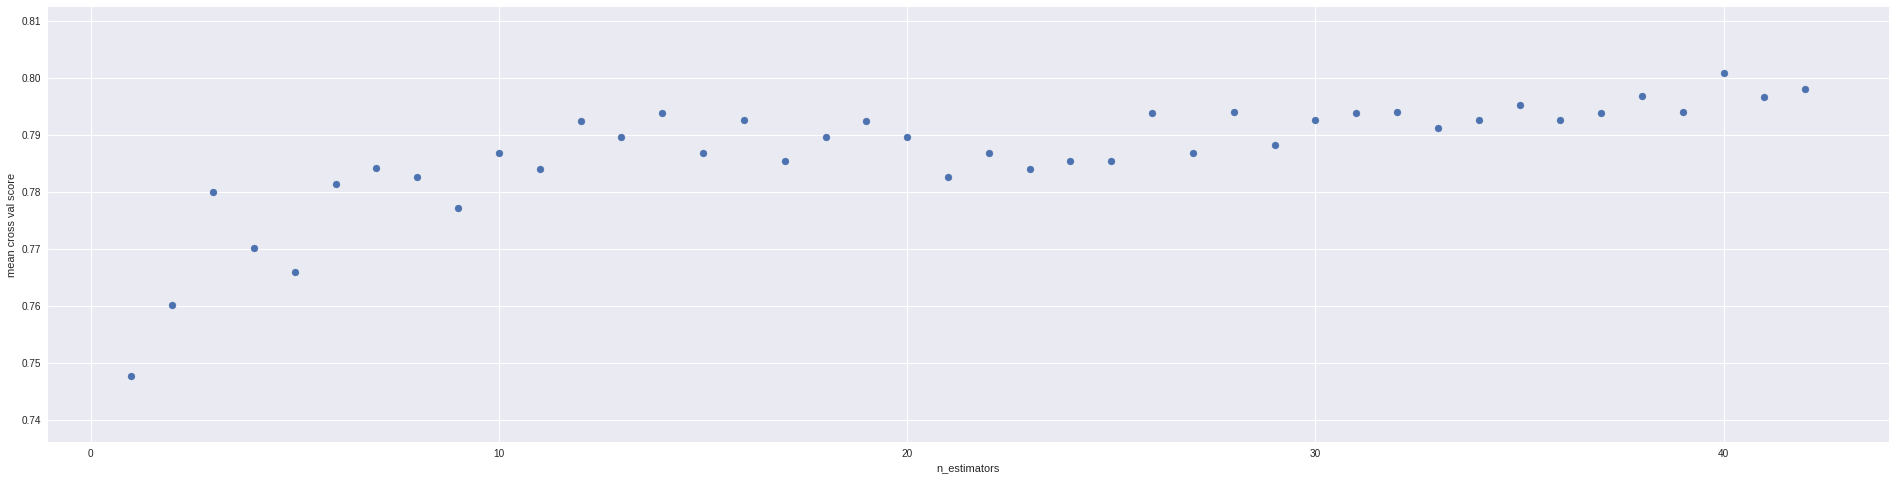

0.8009277889559578 0.7476201654370668


In [0]:
scores= np.zeros(no_of_repetitions)
for i in range (no_of_repetitions):
    clf = RandomForestClassifier(n_estimators=i+1, max_depth=None,
         min_samples_split=2, random_state=0)
    score = cross_val_score(clf, X_titanic, y_titanic, cv=10)
    scores[i] = score.mean()
plt.figure(figsize=(33,8))
plt.scatter(np.arange(1,no_of_repetitions+1,1),scores)
plt.xlabel('n_estimators')
plt.ylabel('mean cross val score')
plt.show()
print np.max(scores), np.min(scores)

## Extremely Randomized Trees
In extremely randomized trees (see ExtraTreesClassifier and ExtraTreesRegressor classes), randomness goes one step further in the way splits are computed. As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias:

### iris

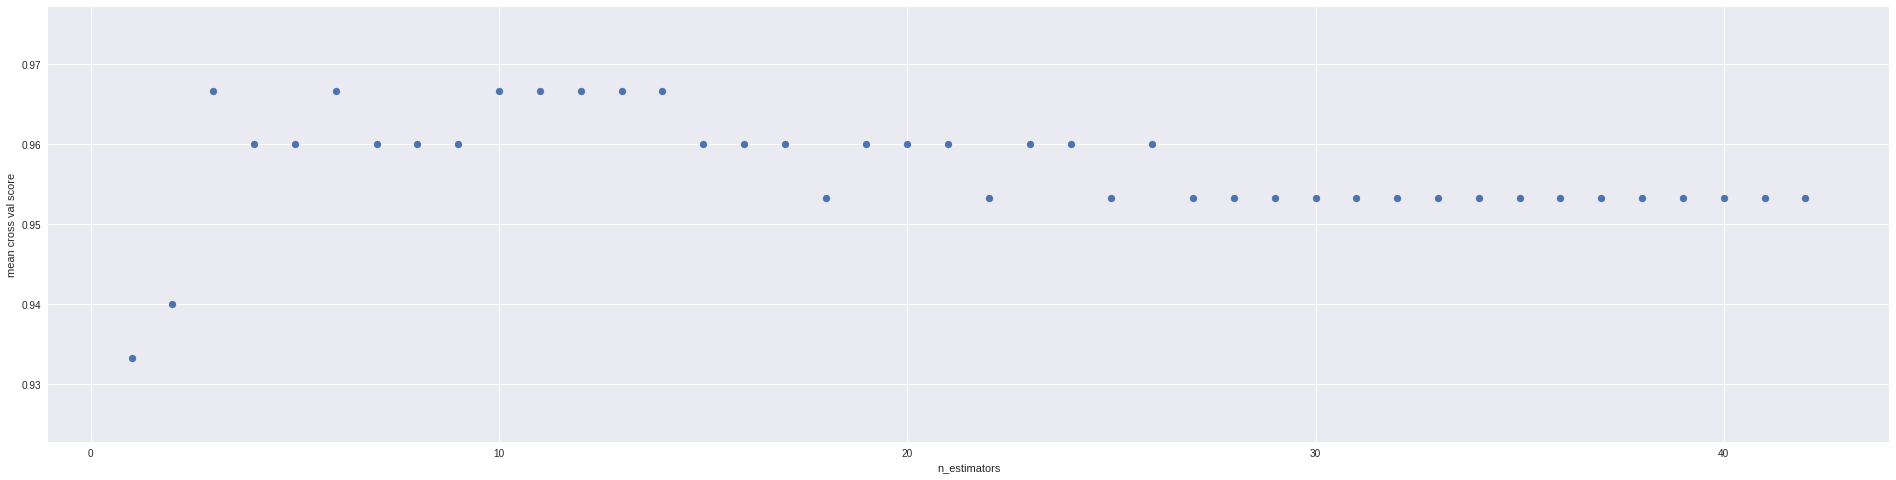

0.9666666666666668 0.9333333333333333


In [0]:
scores= np.zeros(no_of_repetitions)
for i in range (no_of_repetitions):
    clf = ExtraTreesClassifier(n_estimators=i+1, max_depth=None,
     min_samples_split=2, random_state=0)
    score = cross_val_score(clf, X_iris, y_iris, cv=10)
    scores[i] = score.mean()
plt.figure(figsize=(33,8))
plt.scatter(np.arange(1,no_of_repetitions+1,1),scores)
plt.xlabel('n_estimators')
plt.ylabel('mean cross val score')
plt.show()
print np.max(scores), np.min(scores)

### titanic

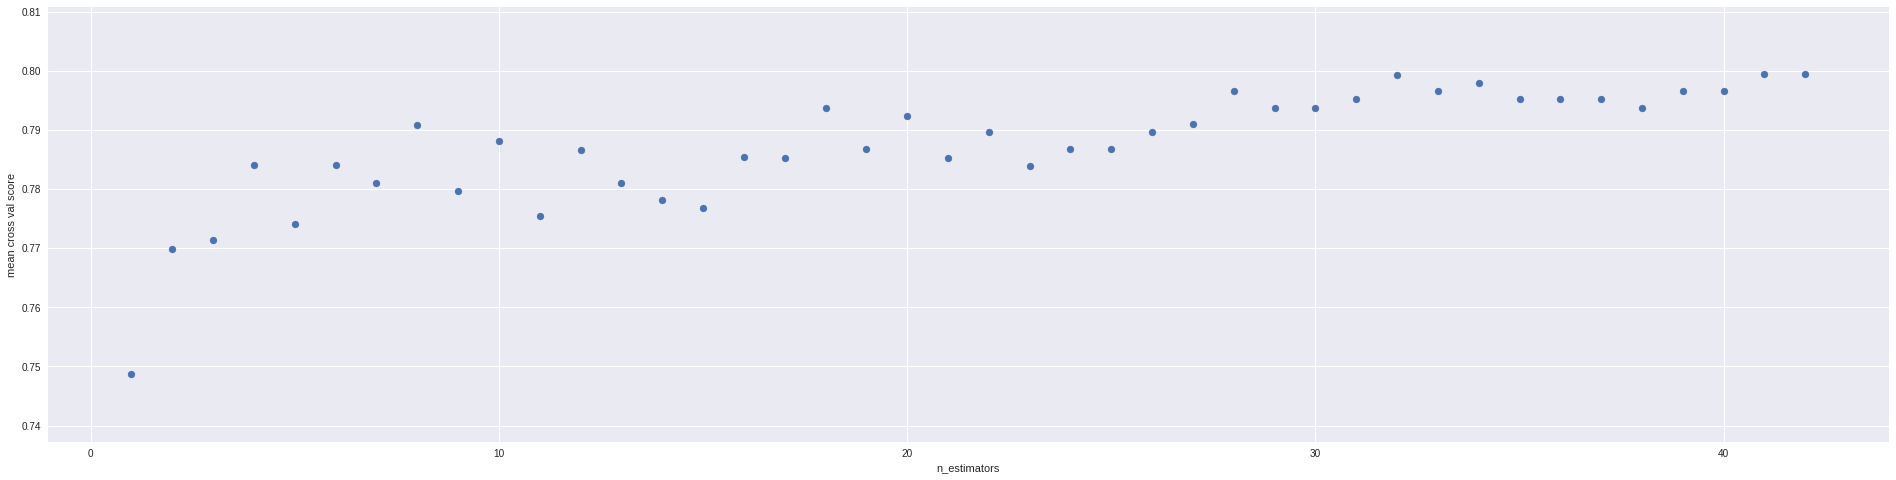

0.7994198524480215 0.7486507936507937


In [0]:
scores= np.zeros(no_of_repetitions)
for i in range (no_of_repetitions):
    clf = ExtraTreesClassifier(n_estimators=i+1, max_depth=None,
    min_samples_split=2, random_state=0)
    score = cross_val_score(clf, X_titanic, y_titanic, cv=10)
    scores[i] = score.mean()
plt.figure(figsize=(33,8))
plt.scatter(np.arange(1,no_of_repetitions+1,1),scores)
plt.xlabel('n_estimators')
plt.ylabel('mean cross val score')
plt.show()
print np.max(scores), np.min(scores)


# Uwaga
W zadaniach 4, 5, 6 i 7 należy zastanowić się także nad preprocessingiem danych: ewentualną
normalizacją, standaryzacją, zmianą kodowania danych czy sposobem traktowania wybrakowanych
rekordów danych, jeśli takie występują. Należy także rozważyć różne algorytmy tworzenia drzew
klasyfikacyjnych (a w zadaniu 7 także innych poznanych klasyfikatorów, niekoniecznie drzew
klasyfikacyjnych), różne ich parametry i ostatecznie wybrać klasyfikator najlepszy (uzasadniając swój wybór
w oparciu o wyniki przeprowadzonych testów). 

In [0]:
print None

None


# Task 4 [2p]

Zbiór danych Mushroom (http://archive.ics.uci.edu/ml/datasets/Mushroom) zawiera informacje o
grzybach i o tym czy są one jadalne, trujące, nie polecane do jedzenia lub nieznane. Zapoznaj się
z tym zbiorem danych i stwórz drzewo decyzyjne określające jadalność grzybów na podstawie ich
cech określonych w zestawie danych. 


In [0]:

def basic_tree_classifier_performance(X,y, max_depth = None,min_samples_split=2, min_samples_leaf=1,max_leaf_nodes=None):
    clf = tree.DecisionTreeClassifier(max_depth=max_depth,min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,max_leaf_nodes=max_leaf_nodes)
    score = cross_val_score(clf, X, y, cv=10)
    return score.mean()

def random_forest_classifier_performance(X,y, max_depth = None,min_samples_split=2, min_samples_leaf=1,max_leaf_nodes=None):
    clf = RandomForestClassifier(n_estimators=50,max_depth=max_depth,min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,max_leaf_nodes=max_leaf_nodes)
    score = cross_val_score(clf, X, y, cv=10)
    return score.mean()

def extremely_classifier_performance(X,y, max_depth = None,min_samples_split=2, min_samples_leaf=1,max_leaf_nodes=None):   
    clf = ExtraTreesClassifier(n_estimators=50,max_depth=max_depth,min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,max_leaf_nodes=max_leaf_nodes)
    score = cross_val_score(clf, X, y, cv=10)
    return score.mean()

def check_performance(X,y, max_depth = None,min_samples_split=2, min_samples_leaf=1,max_leaf_nodes=None):
    print "check performance with max_depth =",max_depth, "min_samples_split =",min_samples_split, " min_samples_leaf =",min_samples_leaf, " max_leaf_nodes =",max_leaf_nodes
    print "basic_tree_classifier_performance",basic_tree_classifier_performance(X,y, max_depth,min_samples_split,min_samples_leaf,max_leaf_nodes)
    print "random_forest_classifier_performance",random_forest_classifier_performance(X,y, max_depth,min_samples_split,min_samples_leaf,max_leaf_nodes)
    print "extremely_classifier_performance",extremely_classifier_performance(X,y, max_depth,min_samples_split,min_samples_leaf,max_leaf_nodes)


1. Title: Mushroom Database

2. Sources: 
    (a) Mushroom records drawn from The Audubon Society Field Guide to North
        American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred
        A. Knopf
    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
    (c) Date: 27 April 1987

3. Past Usage:
    1. Schlimmer,J.S. (1987). Concept Acquisition Through Representational
       Adjustment (Technical Report 87-19).  Doctoral disseration, Department
       of Information and Computer Science, University of California, Irvine.
       --- STAGGER: asymptoted to 95% classification accuracy after reviewing
           1000 instances.
    2. Iba,W., Wogulis,J., & Langley,P. (1988).  Trading off Simplicity
       and Coverage in Incremental Concept Learning. In Proceedings of 
       the 5th International Conference on Machine Learning, 73-79.
       Ann Arbor, Michigan: Morgan Kaufmann.  
       -- approximately the same results with their HILLARY algorithm    
    3. In the following references a set of rules (given below) were
	learned for this data set which may serve as a point of
	comparison for other researchers.

	Duch W, Adamczak R, Grabczewski K (1996) Extraction of logical rules
	from training data using backpropagation networks, in: Proc. of the
	The 1st Online Workshop on Soft Computing, 19-30.Aug.1996, pp. 25-30,
	available on-line at: http://www.bioele.nuee.nagoya-u.ac.jp/wsc1/

	Duch W, Adamczak R, Grabczewski K, Ishikawa M, Ueda H, Extraction of
	crisp logical rules using constrained backpropagation networks -
	comparison of two new approaches, in: Proc. of the European Symposium
	on Artificial Neural Networks (ESANN'97), Bruge, Belgium 16-18.4.1997,
	pp. xx-xx

	Wlodzislaw Duch, Department of Computer Methods, Nicholas Copernicus
	University, 87-100 Torun, Grudziadzka 5, Poland
	e-mail: duch@phys.uni.torun.pl
	WWW     http://www.phys.uni.torun.pl/kmk/
	
	Date: Mon, 17 Feb 1997 13:47:40 +0100
	From: Wlodzislaw Duch <duch@phys.uni.torun.pl>
	Organization: Dept. of Computer Methods, UMK

	I have attached a file containing logical rules for mushrooms.
	It should be helpful for other people since only in the last year I
	have seen about 10 papers analyzing this dataset and obtaining quite
	complex rules. We will try to contribute other results later.

	With best regards, Wlodek Duch
	________________________________________________________________

	Logical rules for the mushroom data sets.

	Logical rules given below seem to be the simplest possible for the
	mushroom dataset and therefore should be treated as benchmark results.

	Disjunctive rules for poisonous mushrooms, from most general
	to most specific:

	P_1) odor=NOT(almond.OR.anise.OR.none)
	     120 poisonous cases missed, 98.52% accuracy

	P_2) spore-print-color=green
	     48 cases missed, 99.41% accuracy
         
	P_3) odor=none.AND.stalk-surface-below-ring=scaly.AND.
	          (stalk-color-above-ring=NOT.brown) 
	     8 cases missed, 99.90% accuracy
         
	P_4) habitat=leaves.AND.cap-color=white
	         100% accuracy     

	Rule P_4) may also be

	P_4') population=clustered.AND.cap_color=white

	These rule involve 6 attributes (out of 22). Rules for edible
	mushrooms are obtained as negation of the rules given above, for
	example the rule:

	odor=(almond.OR.anise.OR.none).AND.spore-print-color=NOT.green

	gives 48 errors, or 99.41% accuracy on the whole dataset.

	Several slightly more complex variations on these rules exist,
	involving other attributes, such as gill_size, gill_spacing,
	stalk_surface_above_ring, but the rules given above are the simplest
	we have found.


4. Relevant Information:
    This data set includes descriptions of hypothetical samples
    corresponding to 23 species of gilled mushrooms in the Agaricus and
    Lepiota Family (pp. 500-525).  Each species is identified as
    definitely edible, definitely poisonous, or of unknown edibility and
    not recommended.  This latter class was combined with the poisonous
    one.  The Guide clearly states that there is no simple rule for
    determining the edibility of a mushroom; no rule like ``leaflets
    three, let it be'' for Poisonous Oak and Ivy.

5. Number of Instances: 8124

6. Number of Attributes: 22 (all nominally valued)

7. Attribute Information: (classes: edible=e, poisonous=p)
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d

8. Missing Attribute Values: 2480 of them (denoted by "?"), all for
   attribute #11.

9. Class Distribution: 
    --    edible: 4208 (51.8%)
    -- poisonous: 3916 (48.2%)
    --     total: 8124 instances

In [0]:
files.upload()

Saving car.data.scv to car.data (1).scv


{u'car.data.scv': 'vhigh,vhigh,2,2,small,low,unacc\nvhigh,vhigh,2,2,small,med,unacc\nvhigh,vhigh,2,2,small,high,unacc\nvhigh,vhigh,2,2,med,low,unacc\nvhigh,vhigh,2,2,med,med,unacc\nvhigh,vhigh,2,2,med,high,unacc\nvhigh,vhigh,2,2,big,low,unacc\nvhigh,vhigh,2,2,big,med,unacc\nvhigh,vhigh,2,2,big,high,unacc\nvhigh,vhigh,2,4,small,low,unacc\nvhigh,vhigh,2,4,small,med,unacc\nvhigh,vhigh,2,4,small,high,unacc\nvhigh,vhigh,2,4,med,low,unacc\nvhigh,vhigh,2,4,med,med,unacc\nvhigh,vhigh,2,4,med,high,unacc\nvhigh,vhigh,2,4,big,low,unacc\nvhigh,vhigh,2,4,big,med,unacc\nvhigh,vhigh,2,4,big,high,unacc\nvhigh,vhigh,2,more,small,low,unacc\nvhigh,vhigh,2,more,small,med,unacc\nvhigh,vhigh,2,more,small,high,unacc\nvhigh,vhigh,2,more,med,low,unacc\nvhigh,vhigh,2,more,med,med,unacc\nvhigh,vhigh,2,more,med,high,unacc\nvhigh,vhigh,2,more,big,low,unacc\nvhigh,vhigh,2,more,big,med,unacc\nvhigh,vhigh,2,more,big,high,unacc\nvhigh,vhigh,3,2,small,low,unacc\nvhigh,vhigh,3,2,small,med,unacc\nvhigh,vhigh,3,2,small,hi

In [0]:
data_mushroom = pd.read_csv("agaricus-lepiota.data.csv", header=None)
data_mushroom = data_mushroom.dropna()
for i in range(23):
    data_mushroom[i] = pd.Categorical(data_mushroom[i]).codes
    
data_mushroom.rename(columns=lambda x: "classified" if x==0 else x, inplace=True)

data_mushroom.head()

,classified,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [0]:
y = data_mushroom['classified']
X = data_mushroom.drop('classified', axis = 1)


In [0]:
check_performance(X,y)

check performance with max_depth = None min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 0.9625930661279485
random_forest_classifier_performance 0.9611134113807228
extremely_classifier_performance 0.9677718577432384


In [0]:
check_performance(X,y,5)

check performance with max_depth = 5 min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 0.9342797299736251
random_forest_classifier_performance 0.9560818875759658
extremely_classifier_performance 0.9446321565558444


In [0]:
check_performance(X,y,2,2,1,3)

check performance with max_depth = 2 min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = 3
basic_tree_classifier_performance 0.794119146250594
random_forest_classifier_performance 0.8946722728071098
extremely_classifier_performance 0.8845635738797725


In [0]:
for i in range (1,23):
    print i,data_mushroom[i].unique()

1 [5 0 4 2 3 1]
2 [2 3 0 1]
3 [4 9 8 3 2 5 0 7 1 6]
4 [1 0]
5 [6 0 3 5 2 1 8 7 4]
6 [1 0]
7 [0 1]
8 [1 0]
9 [ 4  5  2  7 10  3  9  1  0  8 11  6]
10 [0 1]
11 [3 2 1 4 0]
12 [2 0 1 3]
13 [2 0 3 1]
14 [7 3 6 4 0 2 5 1 8]
15 [7 6 3 0 4 2 8 5 1]
16 [0]
17 [2 0 1 3]
18 [1 2 0]
19 [4 0 2 1 3]
20 [2 3 6 1 7 5 4 8 0]
21 [3 2 0 4 5 1]
22 [5 1 3 0 4 6 2]


In [0]:
if (data_mushroom[1] == data_mushroom[1]).all():
    print "1"

1


In [0]:
for i in range(1,22):
    for j in range(i+1,23):
        if (data_mushroom[i] == data_mushroom[j]).all():
            print i,j

In [0]:
y = data_mushroom['classified']
X = data_mushroom.drop('classified', axis = 1)
X_new = X.drop(16,axis=1)

In [0]:
check_performance(X_new,y)
check_performance(X_new,y,5)
check_performance(X_new,y,2,2,1,3)

check performance with max_depth = None min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 0.9625930661279485
random_forest_classifier_performance 0.9586473201353469
extremely_classifier_performance 0.9685116851168513
check performance with max_depth = 5 min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 0.939458521588915
random_forest_classifier_performance 0.9516423166697757
extremely_classifier_performance 0.9514066275064724
check performance with max_depth = 2 min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = 3
basic_tree_classifier_performance 0.794119146250594
random_forest_classifier_performance 0.8992139153911751
extremely_classifier_performance 0.8818623997620441


##shuffled

In [0]:
modified_mushroom = pd.read_csv("agaricus-lepiota.data.csv", header=None)
modified_mushroom = modified_mushroom.dropna()
modified_mushroom = modified_mushroom.sample(frac=1)
for i in range(23):
    modified_mushroom[i] = pd.Categorical(modified_mushroom[i]).codes
    
modified_mushroom.rename(columns=lambda x: "classified" if x==0 else x, inplace=True)
modified_mushroom.head()

,classified,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
5058,1,5,2,0,1,2,1,0,0,10,...,0,7,7,0,2,1,4,1,3,5
1359,0,2,2,8,0,5,1,1,0,5,...,2,7,7,0,2,1,0,2,3,1
6409,1,5,3,2,0,2,1,0,1,0,...,1,6,6,0,2,1,0,7,4,0
2290,0,5,3,3,1,5,1,0,0,9,...,2,3,3,0,2,1,4,2,5,0
5976,0,3,2,2,1,5,1,0,0,1,...,2,7,7,0,2,2,0,7,1,6


In [0]:
y = modified_mushroom['classified']
X = modified_mushroom.drop('classified', axis = 1)

In [0]:
check_performance(X,y)
check_performance(X,y,5)
check_performance(X,y,2,2,1,3)

check performance with max_depth = None min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 1.0
random_forest_classifier_performance 1.0
extremely_classifier_performance 1.0
check performance with max_depth = 5 min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 0.9793201760426854
random_forest_classifier_performance 0.9905234468026833
extremely_classifier_performance 0.9862146137800751
check performance with max_depth = 2 min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = 3
basic_tree_classifier_performance 0.8444157756860653
random_forest_classifier_performance 0.9106368263484619
extremely_classifier_performance 0.8972256030818677


In [0]:
check_performance(X,y)

check performance with max_depth = None min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 1.0
random_forest_classifier_performance 1.0
extremely_classifier_performance 1.0


In [0]:
modified_mushroom[[3,5,9,14,15,20]].head()

,3,5,9,14,15,20
5058,0,2,10,7,7,1
1359,8,5,5,7,7,2
6409,2,2,0,6,6,7
2290,3,5,9,3,3,2
5976,2,5,1,7,7,7


In [0]:
check_performance(modified_mushroom[[3,5,9,14,15,20]],y)

check performance with max_depth = None min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 0.9980315255081994
random_forest_classifier_performance 0.9980315255081994
extremely_classifier_performance 0.9980315255081994


In [0]:
for i in range(1,23):
    print i
    check_performance(modified_mushroom[[i]],y)

1
check performance with max_depth = None min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 0.5642506050712714
random_forest_classifier_performance 0.5642506050712714
extremely_classifier_performance 0.5642506050712714
2
check performance with max_depth = None min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 0.5805064787997014
random_forest_classifier_performance 0.5805064787997014
extremely_classifier_performance 0.5805064787997014
3
check performance with max_depth = None min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 0.5952758767275343
random_forest_classifier_performance 0.5952758767275343
extremely_classifier_performance 0.5952758767275343
4
check performance with max_depth = None min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 0.7439680862265123
random_forest_classifier_per

In [0]:
check_performance(modified_mushroom[[5,8,9,12,13,19,20]],y)

check performance with max_depth = None min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 1.0
random_forest_classifier_performance 1.0
extremely_classifier_performance 1.0


In [0]:
import itertools
def findsubsets(S,m):
    return set(itertools.combinations(S, m))

In [0]:
check_performance(modified_mushroom[list((5, 8, 9))],y)

check performance with max_depth = None min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 0.9886758517093472
random_forest_classifier_performance 0.9886758517093472
extremely_classifier_performance 0.9886758517093472


In [0]:
for elem in findsubsets([5,8,9,12,13,19,20],2):
    check_performance(modified_mushroom[list(elem)],y)

check performance with max_depth = None min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 0.9881830886454376
random_forest_classifier_performance 0.9881830886454376
extremely_classifier_performance 0.9881830886454376
check performance with max_depth = None min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 0.9098998811916287
random_forest_classifier_performance 0.9098998811916287
extremely_classifier_performance 0.9098998811916287
check performance with max_depth = None min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 0.9069440624462795
random_forest_classifier_performance 0.9069440624462795
extremely_classifier_performance 0.9069440624462795
check performance with max_depth = None min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 0.9327932702361895
random_forest_classifier_performance

In [0]:
for elem in findsubsets([5,8,9,12,13,19,20],3):
    print "basic_tree_classifier_performance",basic_tree_classifier_performance(modified_mushroom[list(elem)],y)

basic_tree_classifier_performance 0.9901539883010427
basic_tree_classifier_performance 0.994091696175628
basic_tree_classifier_performance 0.9886758517093472
basic_tree_classifier_performance 0.9374709550959256
basic_tree_classifier_performance 0.9929834717764912
basic_tree_classifier_performance 0.9911373922237517
basic_tree_classifier_performance 0.9886758517093472
basic_tree_classifier_performance 0.9773495808400225
basic_tree_classifier_performance 0.9852299976490254
basic_tree_classifier_performance 0.994091696175628
basic_tree_classifier_performance 0.931685804354475
basic_tree_classifier_performance 0.9748880406991797
basic_tree_classifier_performance 0.9423944928041482
basic_tree_classifier_performance 0.974643251194619
basic_tree_classifier_performance 0.9763655706263622
basic_tree_classifier_performance 0.9261475645755711
basic_tree_classifier_performance 0.9901539883010427
basic_tree_classifier_performance 0.9901539883010427
basic_tree_classifier_performance 0.94682450668966

In [0]:
for elem in findsubsets([5,8,9,12,13,19,20],4):
    print elem,"basic_tree_classifier_performance",basic_tree_classifier_performance(modified_mushroom[list(elem)],y)

(5, 13, 19, 20) basic_tree_classifier_performance 0.9990156868276451
(5, 12, 13, 20) basic_tree_classifier_performance 0.9980307673643392
(5, 8, 12, 19) basic_tree_classifier_performance 0.9901539883010427
(8, 13, 19, 20) basic_tree_classifier_performance 0.9793192679137253
(5, 9, 12, 20) basic_tree_classifier_performance 0.9945844592395374
(9, 12, 19, 20) basic_tree_classifier_performance 0.9438718701312979
(9, 12, 13, 19) basic_tree_classifier_performance 0.9320551102560828
(5, 12, 19, 20) basic_tree_classifier_performance 0.9990156868276451
(5, 8, 12, 13) basic_tree_classifier_performance 0.9901539883010427
(5, 8, 9, 19) basic_tree_classifier_performance 0.989660164881702
(5, 9, 13, 19) basic_tree_classifier_performance 0.9931070792974548
(8, 9, 13, 19) basic_tree_classifier_performance 0.9586415702707013
(8, 12, 13, 19) basic_tree_classifier_performance 0.957164341434404
(5, 8, 12, 20) basic_tree_classifier_performance 0.9990156868276451
(8, 9, 19, 20) basic_tree_classifier_perform

In [0]:
for elem in findsubsets([5,8,9,12,13,19,20],5):
    print elem,"basic_tree_classifier_performance",basic_tree_classifier_performance(modified_mushroom[list(elem)],y)

(5, 8, 13, 19, 20) basic_tree_classifier_performance 1.0
(9, 12, 13, 19, 20) basic_tree_classifier_performance 0.9438718701312979
(8, 9, 12, 13, 19) basic_tree_classifier_performance 0.9645497218686023
(5, 8, 12, 13, 20) basic_tree_classifier_performance 0.9990156868276451
(5, 8, 9, 19, 20) basic_tree_classifier_performance 0.9955687724118925
(5, 8, 9, 13, 19) basic_tree_classifier_performance 0.9940913924698098
(8, 9, 13, 19, 20) basic_tree_classifier_performance 0.9822749363004128
(5, 9, 12, 13, 20) basic_tree_classifier_performance 0.9985235304282485
(8, 9, 12, 19, 20) basic_tree_classifier_performance 0.9822749363004128
(5, 9, 12, 19, 20) basic_tree_classifier_performance 0.9990156868276451
(5, 8, 9, 12, 20) basic_tree_classifier_performance 0.9990156868276451
(5, 8, 9, 13, 20) basic_tree_classifier_performance 0.9990156868276451
(8, 12, 13, 19, 20) basic_tree_classifier_performance 0.9807972537731973
(8, 9, 12, 13, 20) basic_tree_classifier_performance 0.981290623128058
(5, 8, 9, 

In [0]:
t = tree.DecisionTreeClassifier()
t = t.fit(modified_mushroom[list((5, 8, 13, 19, 20))],y)


In [0]:
t.score(modified_mushroom[list((5, 8, 13, 19, 20))],y)

1.0

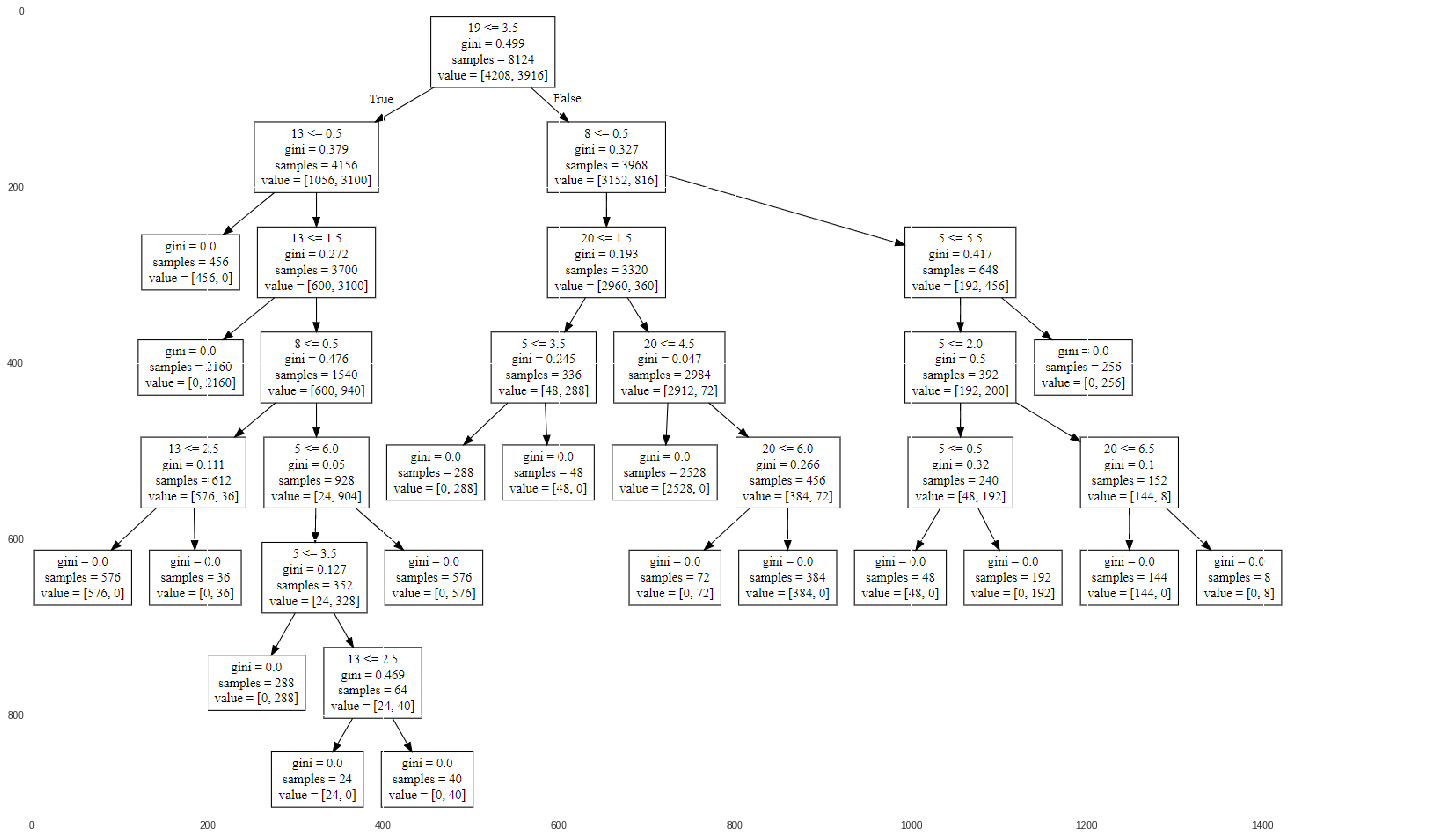

In [0]:
image = imageio.imread('mushroom.PNG')
plt.figure(figsize=(25,25))
plt.imshow(image)

# Task 5 [2p]

Zbiór danych Car Evaluation (http://archive.ics.uci.edu/ml/datasets/Car+Evaluation) zawiera
informacje o samochodach i rekomendacje dotyczącą ich ewentualnego kupna. Zapoznaj się z tym
zbiorem danych i stwórz dla niego drzewo decyzyjne.

1. Title: Car Evaluation Database

2. Sources:
   (a) Creator: Marko Bohanec
   (b) Donors: Marko Bohanec   (marko.bohanec@ijs.si)
               Blaz Zupan      (blaz.zupan@ijs.si)
   (c) Date: June, 1997

3. Past Usage:

   The hierarchical decision model, from which this dataset is
   derived, was first presented in 

   M. Bohanec and V. Rajkovic: Knowledge acquisition and explanation for
   multi-attribute decision making. In 8th Intl Workshop on Expert
   Systems and their Applications, Avignon, France. pages 59-78, 1988.

   Within machine-learning, this dataset was used for the evaluation
   of HINT (Hierarchy INduction Tool), which was proved to be able to
   completely reconstruct the original hierarchical model. This,
   together with a comparison with C4.5, is presented in

   B. Zupan, M. Bohanec, I. Bratko, J. Demsar: Machine learning by
   function decomposition. ICML-97, Nashville, TN. 1997 (to appear)

4. Relevant Information Paragraph:

   Car Evaluation Database was derived from a simple hierarchical
   decision model originally developed for the demonstration of DEX
   (M. Bohanec, V. Rajkovic: Expert system for decision
   making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates
   cars according to the following concept structure:

   CAR                      car acceptability
   
   
   . PRICE                  overall price
   
   
   . . buying               buying price
   
   
   . . maint                price of the maintenance
   
   
   . TECH                   technical characteristics
   
   
   . . COMFORT              comfort
   
   
   . . . doors              number of doors
   
   
   . . . persons            capacity in terms of persons to carry
   
   
   . . . lug_boot           the size of luggage boot
   
   
   . . safety               estimated safety of the car

   Input attributes are printed in lowercase. Besides the target
   concept (CAR), the model includes three intermediate concepts:
   PRICE, TECH, COMFORT. Every concept is in the original model
   related to its lower level descendants by a set of examples (for
   these examples sets see http://www-ai.ijs.si/BlazZupan/car.html).

   The Car Evaluation Database contains examples with the structural
   information removed, i.e., directly relates CAR to the six input
   attributes: buying, maint, doors, persons, lug_boot, safety.

   Because of known underlying concept structure, this database may be
   particularly useful for testing constructive induction and
   structure discovery methods.

5. Number of Instances: 1728
   (instances completely cover the attribute space)

6. Number of Attributes: 6

7. Attribute Values:

   buying       v-high, high, med, low
   
   
   maint        v-high, high, med, low
   
   
   doors        2, 3, 4, 5-more
   
   
   persons      2, 4, more
   
   
   lug_boot     small, med, big
   
   
   safety       low, med, high
   

8. Missing Attribute Values: none

9. Class Distribution (number of instances per class)

class        
   unacc     1210     (70.023 %) 
   
   acc        384     (22.222 %) 
   
   good        69     ( 3.993 %) 
   
   v-good      65     ( 3.762 %) 

In [0]:
data_cars = pd.read_csv("car.data.scv", header=None)
data_cars = data_cars.dropna()
for i in range(7):
    data_cars[i] = pd.Categorical(data_cars[i]).codes
    
data_cars.rename(columns=lambda x: "classified" if x==6 else x, inplace=True)

data_cars.head()

,0,1,2,3,4,5,classified
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [0]:
y = data_cars['classified']
X = data_cars.drop('classified', axis = 1)


In [0]:
check_performance(X,y)
check_performance(X,y,5)
check_performance(X,y,2,2,1,3)

check performance with max_depth = None min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 0.8673180511705597
random_forest_classifier_performance 0.8429021037435049
extremely_classifier_performance 0.8563044061722851
check performance with max_depth = 5 min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 0.7791955596585645
random_forest_classifier_performance 0.7842900864925431
extremely_classifier_performance 0.7466904500761602
check performance with max_depth = 2 min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = 3
basic_tree_classifier_performance 0.7691971775766555
random_forest_classifier_performance 0.7002586988273597
extremely_classifier_performance 0.7002586988273597


In [0]:
for i in range (0,6):
    print i,data_cars[i].unique()

0 [3 0 2 1]
1 [3 0 2 1]
2 [0 1 2 3]
3 [0 1 2]
4 [2 1 0]
5 [1 2 0]


In [0]:
for i in range(0,5):
    for j in range(i+1,6):
        if (data_cars[i] == data_cars[j]).all():
            print i,j

## shuffled

In [0]:
modified_cars = pd.read_csv("car.data.scv", header=None)
modified_cars = modified_cars.dropna()
modified_cars = modified_cars.sample(frac=1)
for i in range(7):
    modified_cars[i] = pd.Categorical(modified_cars[i]).codes
    
modified_cars.rename(columns=lambda x: "classified" if x==6 else x, inplace=True)
modified_cars.head()

,0,1,2,3,4,5,classified
145,3,0,1,1,2,2,2
920,2,3,2,0,2,0,2
1020,2,0,1,2,1,1,2
404,3,1,2,2,0,0,0
125,3,0,0,1,0,0,2


In [0]:
y = modified_cars['classified']
X = modified_cars.drop('classified', axis = 1)

In [0]:
check_performance(X,y)
check_performance(X,y,5)
check_performance(X,y,2,2,1,3)

check performance with max_depth = None min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 0.9808737454357891
random_forest_classifier_performance 0.980332758733186
extremely_classifier_performance 0.9711005036296962
check performance with max_depth = 5 min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 0.8588236660660431
random_forest_classifier_performance 0.8368809450560871
extremely_classifier_performance 0.8015521787326598
check performance with max_depth = 2 min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = 3
basic_tree_classifier_performance 0.7690777082115015
random_forest_classifier_performance 0.7002586988273597
extremely_classifier_performance 0.7002586988273597


In [0]:
for i in range(0,6):
    print i
    print "basic_tree_classifier_performance",basic_tree_classifier_performance(modified_cars[[i]],y)


0
basic_tree_classifier_performance 0.7002586988273597
1
basic_tree_classifier_performance 0.7002586988273597
2
basic_tree_classifier_performance 0.7002586988273597
3
basic_tree_classifier_performance 0.7002586988273597
4
basic_tree_classifier_performance 0.7002586988273597
5
basic_tree_classifier_performance 0.7002586988273597


In [0]:
for elem in findsubsets(range(6),2):
    print elem,"basic_tree_classifier_performance",basic_tree_classifier_performance(modified_cars[list(elem)],y)

(0, 1) basic_tree_classifier_performance 0.7002586988273597
(1, 2) basic_tree_classifier_performance 0.7002586988273597
(2, 5) basic_tree_classifier_performance 0.7002586988273597
(1, 3) basic_tree_classifier_performance 0.6932886373464723
(4, 5) basic_tree_classifier_performance 0.7002586988273597
(1, 4) basic_tree_classifier_performance 0.7002586988273597
(2, 4) basic_tree_classifier_performance 0.7002586988273597
(1, 5) basic_tree_classifier_performance 0.6910335933577232
(0, 5) basic_tree_classifier_performance 0.6863519893913802
(0, 4) basic_tree_classifier_performance 0.7002586988273597
(2, 3) basic_tree_classifier_performance 0.7002586988273597
(0, 3) basic_tree_classifier_performance 0.6818077498832271
(3, 4) basic_tree_classifier_performance 0.7002586988273597
(0, 2) basic_tree_classifier_performance 0.7002586988273597
(3, 5) basic_tree_classifier_performance 0.7777621753114075


In [0]:
for elem in findsubsets(range(6),3):
    print elem,"basic_tree_classifier_performance",basic_tree_classifier_performance(modified_cars[list(elem)],y)

(1, 2, 5) basic_tree_classifier_performance 0.6782729485423434
(1, 2, 3) basic_tree_classifier_performance 0.6678237789963737
(0, 3, 4) basic_tree_classifier_performance 0.6736681750157719
(0, 2, 5) basic_tree_classifier_performance 0.6643993415722595
(3, 4, 5) basic_tree_classifier_performance 0.8072966059285278
(2, 3, 5) basic_tree_classifier_performance 0.7870576629965393
(0, 1, 2) basic_tree_classifier_performance 0.7002586988273597
(0, 3, 5) basic_tree_classifier_performance 0.8084663151676251
(1, 4, 5) basic_tree_classifier_performance 0.6684693021558877
(0, 1, 5) basic_tree_classifier_performance 0.7366661937742968
(1, 3, 5) basic_tree_classifier_performance 0.7968913622420342
(0, 2, 3) basic_tree_classifier_performance 0.6586150485601776
(2, 4, 5) basic_tree_classifier_performance 0.662645032186364
(0, 1, 4) basic_tree_classifier_performance 0.6950862850342563
(1, 3, 4) basic_tree_classifier_performance 0.6887212235369687
(0, 4, 5) basic_tree_classifier_performance 0.6684592594

In [0]:
for elem in findsubsets(range(6),4):
    print elem,"basic_tree_classifier_performance",basic_tree_classifier_performance(modified_cars[list(elem)],y)

(0, 2, 3, 5) basic_tree_classifier_performance 0.7765995018541746
(1, 2, 4, 5) basic_tree_classifier_performance 0.6274004038384277
(0, 1, 3, 4) basic_tree_classifier_performance 0.69223933471837
(0, 1, 2, 4) basic_tree_classifier_performance 0.5804431836420931
(1, 2, 3, 5) basic_tree_classifier_performance 0.7870510975318218
(1, 2, 3, 4) basic_tree_classifier_performance 0.6111240326342088
(0, 2, 4, 5) basic_tree_classifier_performance 0.6303041378339892
(0, 1, 2, 5) basic_tree_classifier_performance 0.6852494575698169
(0, 2, 3, 4) basic_tree_classifier_performance 0.5978788310415063
(0, 3, 4, 5) basic_tree_classifier_performance 0.7997821198215744
(2, 3, 4, 5) basic_tree_classifier_performance 0.8309799584987813
(1, 3, 4, 5) basic_tree_classifier_performance 0.7726298970553023
(0, 1, 2, 3) basic_tree_classifier_performance 0.6336949265737346
(0, 1, 3, 5) basic_tree_classifier_performance 0.8570457933845
(0, 1, 4, 5) basic_tree_classifier_performance 0.7807425045881674


In [0]:
for elem in findsubsets(range(6),5):
    print elem,"basic_tree_classifier_performance",basic_tree_classifier_performance(modified_cars[list(elem)],y)

(1, 2, 3, 4, 5) basic_tree_classifier_performance 0.7257233240519565
(0, 2, 3, 4, 5) basic_tree_classifier_performance 0.7707718698625137
(0, 1, 2, 3, 5) basic_tree_classifier_performance 0.8409341409342874
(0, 1, 2, 4, 5) basic_tree_classifier_performance 0.757022299890965
(0, 1, 2, 3, 4) basic_tree_classifier_performance 0.625007175386089
(0, 1, 3, 4, 5) basic_tree_classifier_performance 0.946781865091302


In [0]:
for elem in findsubsets(range(6),6):
    print elem,"basic_tree_classifier_performance",basic_tree_classifier_performance(modified_cars[list(elem)],y)

(0, 1, 2, 3, 4, 5) basic_tree_classifier_performance 0.980359528182176


In [0]:
t = tree.DecisionTreeClassifier()
t = t.fit(X,y)
t.score(X,y)

1.0

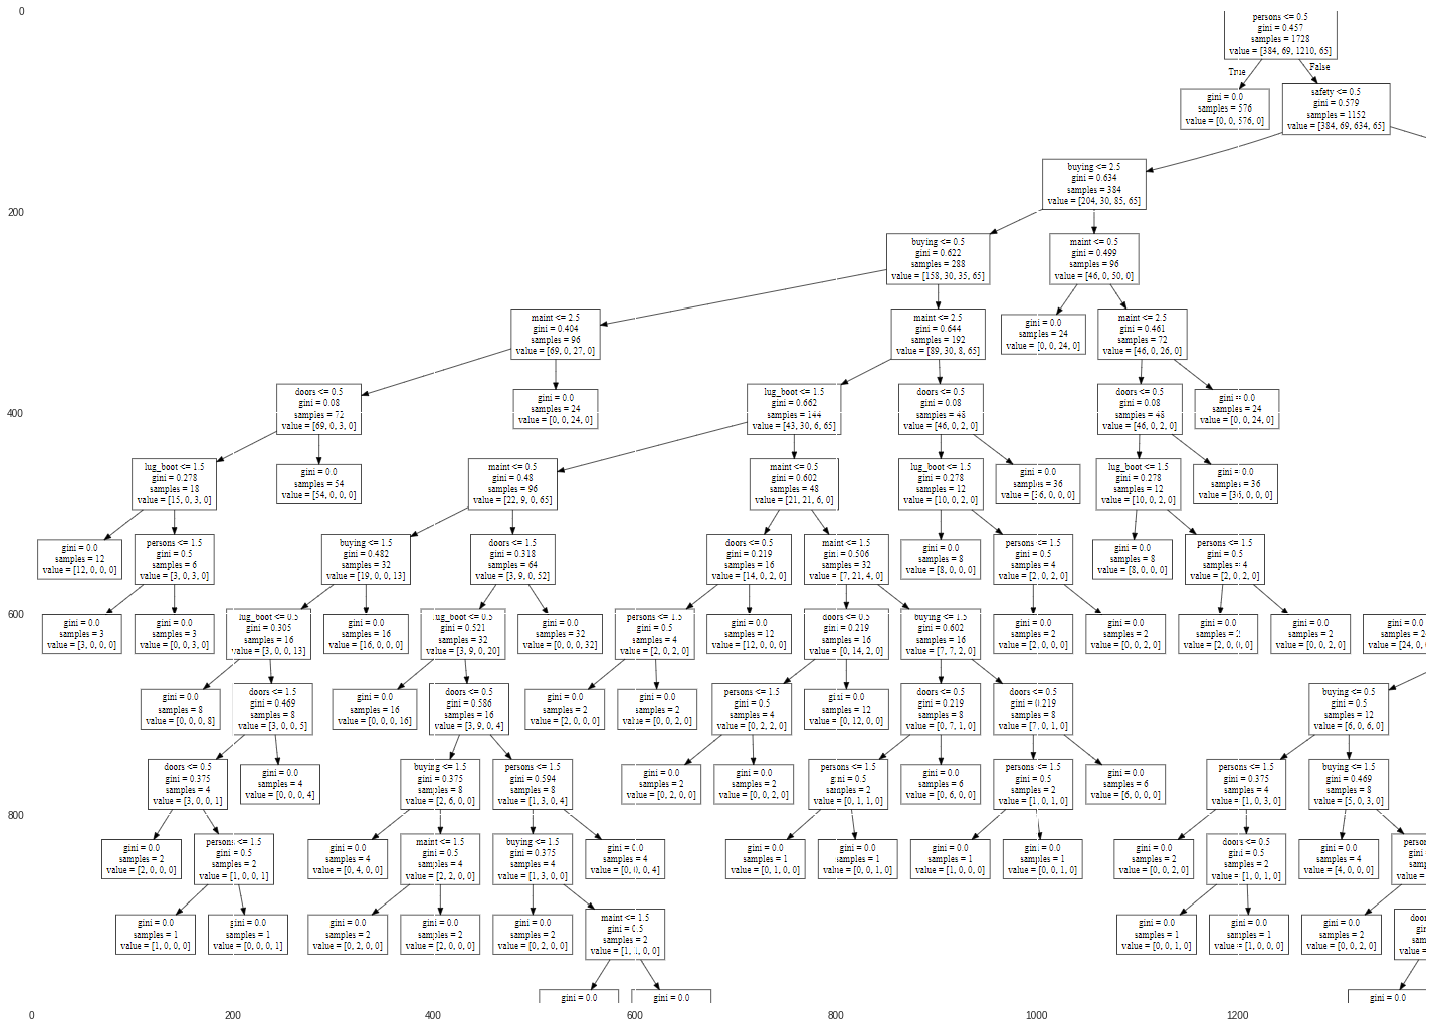

In [0]:
image = imageio.imread('car1.PNG')
plt.figure(figsize=(25,25))
plt.imshow(image)

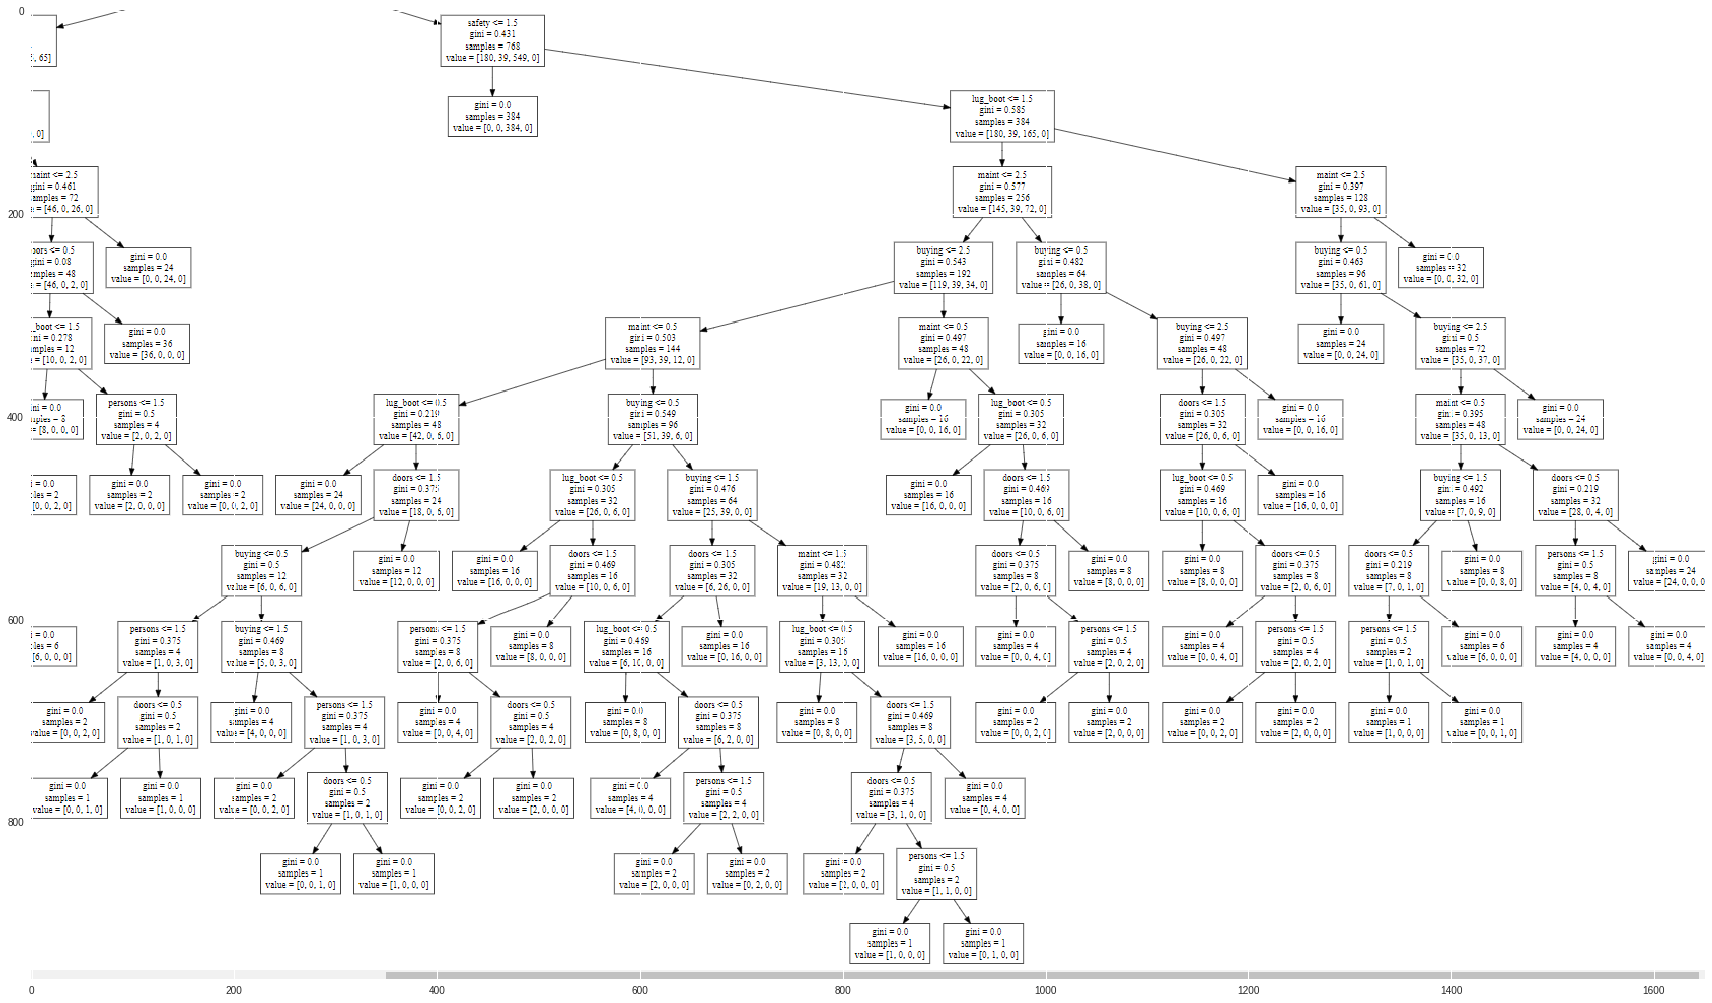

In [0]:
image = imageio.imread('car2.PNG')
plt.figure(figsize=(30,25))
plt.imshow(image)

# Task 6 [2p]
Zbiór danych Bank Marketing (http://archive.ics.uci.edu/ml/datasets/Bank+Marketing) zawiera
informacje o klientach banku i ich zainteresowaniu lokatami bankowymi. Zapoznaj się z tym
zbiorem danych i na jego podstawie stwórz drzewo decyzyjne pozwalające przewidywać czy klient
banku będzie zainteresowany lokatami czy nie na podstawie zgromadzonych o nim informacji. 


Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


Attribute Information:

Input variables:
# bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')


10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)


Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')




"age";"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"

In [0]:
data_bank = pd.read_csv("bank.csv", sep=';', header=None)
data_bank.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [0]:
data_bank = data_bank.dropna()
for i in range(17):
    data_bank[i] = pd.Categorical(data_bank[i]).codes
    
data_bank.rename(columns=lambda x: "classified" if x==16 else x, inplace=True)

data_bank.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,classified
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,3,0
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0,0
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0,0
3,11,4,1,2,0,1352,1,1,2,2,6,195,3,0,0,3,0
4,40,1,1,1,0,274,1,0,2,4,8,222,0,0,0,3,0


In [0]:
y = data_bank['classified']
X = data_bank.drop('classified', axis = 1)

In [0]:
y.value_counts()

0    4000
1     521
Name: classified, dtype: int64

## **NAIVE CLASSIFIER ALLWAYS RETURNING 0**

In [0]:
4000./4521

0.8847600088476001

In [0]:
for i in range (0,16):
    print i,data_bank[i].unique()

0 [11 14 16 40 17 20 22 24  1 12 21 37 18  6 19 23 25  7 36 48 34 49 13 30
 59  4 33 15 42 26 29 38 35 44 32 10 31  8 41  9  2 39  3 27  5 58 56 28
 51 46 45 43 47  0 62 63 61 52 53 50 60 54 65 55 57 66 64]
1 [10  7  4  1  6  9  2  0  8  3  5 11]
2 [1 2 0]
3 [0 1 2 3]
4 [0 1]
5 [1475 2030 1303 ...  119    0 1187]
6 [0 1]
7 [0 1]
8 [0 2 1]
9 [18 10 15  2  4 22 13  5 16 19 12 29 28 26  6 17 11 20 25 21  1  3 14  7
 27  8  0  9 30 24 23]
10 [10  8  0  6  3  1  4  5  9 11  7  2]
11 [ 75 216 181 195 222 137 337 147  53 309 269 109 324 257  85 185 235 110
 246 144  92 136 105 121 165 178 243 115 145  70 742  77  36 763 350 146
  93 128 686  12 572 102 361 201   7 101  55 419 200 177 786 865  94 433
 268 155 291 310 550 530 319 223 130 219 151 126 587 160 264 375 150 217
  63 363  83 642 606  59 393 220 401  56 501 275 199 197 367 386 161 227
 287 229 460 665 333 529 341  61   5 255 366 276 239 429 254   3 313  72
 166 381  79  65 539 556 695 277 867  47  28 172 157 183  20  81 232  50
  67 4

In [0]:
X = X.drop(11, axis = 1)
check_performance(X,y)
check_performance(X,y,5)
check_performance(X,y,2,2,1,3)

check performance with max_depth = None min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 0.8150925980191056
random_forest_classifier_performance 0.8894039735099337
extremely_classifier_performance 0.8882977788196682
check performance with max_depth = 5 min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 0.8827707124577545
random_forest_classifier_performance 0.8865298208599504
extremely_classifier_performance 0.8847603977417025
check performance with max_depth = 2 min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = 3
basic_tree_classifier_performance 0.8896276543788705
random_forest_classifier_performance 0.8847603977417025
extremely_classifier_performance 0.8847603977417025


In [0]:
for i in range(1,14):
    for j in range(i+1,15):
        if (data_bank[i] == data_bank[j]).all():
            print i,j

## shuffled

In [0]:
data_bank_m = pd.read_csv("bank.csv", sep=';', header=None)
data_bank_m = data_bank_m.dropna()
data_bank_m = data_bank_m.sample(frac=1)
for i in range(17):
    data_bank_m[i] = pd.Categorical(data_bank_m[i]).codes
    
data_bank_m.rename(columns=lambda x: "classified" if x==16 else x, inplace=True)

data_bank_m.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,classified
639,8,4,2,2,0,906,1,0,2,4,6,557,2,0,0,3,1
4487,30,2,0,1,0,306,0,0,0,4,3,124,0,0,0,3,0
3024,30,4,0,2,0,1510,0,1,0,16,9,127,1,0,0,3,0
3619,28,9,1,0,0,418,1,0,2,6,8,153,5,0,0,3,0
929,32,0,0,1,0,601,1,0,2,7,8,182,0,0,0,3,0


In [0]:
y = data_bank_m['classified']
X = data_bank_m.drop('classified', axis = 1)
X = data_bank.drop(11, axis = 1)

In [0]:
check_performance(X,y)
check_performance(X,y,5)
check_performance(X,y,2,2,1,3)

check performance with max_depth = None min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 0.77416827834105
random_forest_classifier_performance 0.884096680927543
extremely_classifier_performance 0.8794521283869582
check performance with max_depth = 5 min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 0.8814418136709058
random_forest_classifier_performance 0.8847603977417025
extremely_classifier_performance 0.8847603977417025
check performance with max_depth = 2 min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = 3
basic_tree_classifier_performance 0.8845391588036493
random_forest_classifier_performance 0.8847603977417025
extremely_classifier_performance 0.8847603977417025


In [0]:
for i in range(0,16):
    print i
    print "basic_tree_classifier_performance",basic_tree_classifier_performance(data_bank[[i]],y)

0
basic_tree_classifier_performance 0.8845391588036493
1
basic_tree_classifier_performance 0.8847603977417025
2
basic_tree_classifier_performance 0.8847603977417025
3
basic_tree_classifier_performance 0.8847603977417025
4
basic_tree_classifier_performance 0.8847603977417025
5
basic_tree_classifier_performance 0.8356580515345093
6
basic_tree_classifier_performance 0.8847603977417025
7
basic_tree_classifier_performance 0.8847603977417025
8
basic_tree_classifier_performance 0.8847603977417025
9
basic_tree_classifier_performance 0.8847603977417025
10
basic_tree_classifier_performance 0.8847603977417025
11
basic_tree_classifier_performance 0.8732584148938247
12
basic_tree_classifier_performance 0.8847603977417025
13
basic_tree_classifier_performance 0.8794516400007814
14
basic_tree_classifier_performance 0.8849811482935788
15
basic_tree_classifier_performance 0.8847603977417025


In [0]:
"basic_tree_classifier_performance",basic_tree_classifier_performance(data_bank_m[[14, 15]],y)

('basic_tree_classifier_performance', 0.8920593291527477)

In [0]:
for elem in findsubsets([0,1,2,3,4,5,6,7,8,9,10,12,13,14,15],15):
    print elem,"basic_tree_classifier_performance",basic_tree_classifier_performance(data_bank[list(elem)],y)

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15) basic_tree_classifier_performance 0.8170803297583464


In [0]:
for elem in findsubsets([1, 2, 7, 8, 10, 12, 14, 15],6):
    print elem,"basic_tree_classifier_performance",basic_tree_classifier_performance(data_bank_m[list(elem)],y)

(1, 2, 7, 8, 12, 14) basic_tree_classifier_performance 0.8590981460860732
(1, 2, 7, 8, 12, 15) basic_tree_classifier_performance 0.8741428822598604
(1, 7, 8, 10, 12, 14) basic_tree_classifier_performance 0.8575567993123523
(2, 7, 8, 10, 14, 15) basic_tree_classifier_performance 0.8838749536033133
(1, 8, 10, 12, 14, 15) basic_tree_classifier_performance 0.8622018402391138
(1, 2, 10, 12, 14, 15) basic_tree_classifier_performance 0.8544565238625484
(1, 2, 8, 10, 12, 15) basic_tree_classifier_performance 0.8604294868038055
(1, 2, 7, 12, 14, 15) basic_tree_classifier_performance 0.8748105061634336
(1, 2, 7, 10, 14, 15) basic_tree_classifier_performance 0.86883851999453
(1, 2, 7, 8, 10, 14) basic_tree_classifier_performance 0.8610927152317881
(1, 2, 7, 8, 10, 15) basic_tree_classifier_performance 0.8721561272929732
(1, 2, 8, 10, 12, 14) basic_tree_classifier_performance 0.8495912207700874
(2, 7, 10, 12, 14, 15) basic_tree_classifier_performance 0.8723744359139658
(2, 7, 8, 12, 14, 15) basic_

In [0]:
data_bank_m.loc[data_bank_m['classified'] == 1]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,classified
314,6,0,2,2,0,945,1,0,0,26,8,219,2,34,2,0,1
2953,3,8,2,2,0,896,0,0,0,18,1,334,0,0,0,3,1
3844,20,0,1,1,0,829,1,0,0,11,8,443,1,252,3,0,1
3780,7,4,2,2,0,441,0,0,0,14,6,125,0,0,0,3,1
358,29,0,0,1,0,1955,0,0,0,1,0,392,1,0,0,3,1
3036,54,5,1,0,0,543,0,0,0,27,4,394,2,0,0,3,1
2539,25,9,0,1,0,288,0,0,0,12,9,163,0,37,1,2,1
1021,26,0,1,1,0,2085,1,1,2,20,10,183,0,0,0,3,1
1085,14,1,1,1,0,874,1,0,0,17,5,766,0,0,0,3,1
1611,27,4,0,2,0,1276,0,0,0,10,1,648,2,0,0,3,1


In [0]:
new_bank = pd.concat([data_bank_m.loc[data_bank_m['classified'] == 1],data_bank_m.loc[data_bank_m['classified'] != 1].head(1800)])
new_bank = new_bank.sample(frac=1)
new_bank.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,classified
2208,9,1,1,1,0,1291,1,0,0,14,8,238,0,0,0,3,0
2034,23,9,1,1,0,723,1,0,0,6,5,212,4,0,0,3,0
4140,35,6,0,0,0,1987,1,0,1,17,8,189,3,0,0,3,0
3883,38,0,1,1,0,440,0,0,0,13,1,176,0,51,2,0,0
2816,15,9,2,2,0,812,1,0,2,15,8,475,1,0,0,3,0


In [0]:
y = new_bank['classified']
X = new_bank.drop('classified', axis = 1)
X = X.drop(11,axis=1)

In [0]:
check_performance(X,y)
check_performance(X,y,5)
check_performance(X,y,2,2,1,3)

check performance with max_depth = None min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 0.8134379162350156
random_forest_classifier_performance 0.8487864436880272
extremely_classifier_performance 0.8427482610626017
check performance with max_depth = 5 min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = None
basic_tree_classifier_performance 0.8250850969365103
random_forest_classifier_performance 0.8388708006511765
extremely_classifier_performance 0.7966423708746485
check performance with max_depth = 2 min_samples_split = 2  min_samples_leaf = 1  max_leaf_nodes = 3
basic_tree_classifier_performance 0.7845752552908095
random_forest_classifier_performance 0.7768203344679591
extremely_classifier_performance 0.7755290809530856


## confusion matrix

In [0]:
t = tree.DecisionTreeClassifier()
t = t.fit(X,y)
t.score(X,y)

1.0

In [0]:
from sklearn.metrics import confusion_matrix

y_predict = t.predict(X)

confusion_matrix(y,y_predict)

array([[4000,    0],
       [   0,  521]])

In [0]:
from sklearn.metrics import confusion_matrix

y_predict = t.predict(X)

confusion_matrix(y,y_predict)

array([[3569,  431],
       [   0,  521]])

In [0]:
y_predict[y_predict != y]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [0]:
np.sum(y_predict != y)

431

In [0]:
521. / (431+521)

0.5472689075630253

In [0]:
np.sum(y_predict == y)*1.0/len(y_predict)

0.9024552090245521

In [0]:
t.score(X,y)

0.9046671090466711

In [0]:
t = tree.DecisionTreeClassifier(max_depth=5)
t = t.fit(X,y)
t.score(X,y)

0.8569582076691081

In [0]:
t.score(X,y)

0.8969254589692546

In [0]:
image = imageio.imread('bank.PNG')
plt.figure(figsize=(25,25))
plt.imshow(image)

digraph Tree {
node [shape=box] ;
0 [label="duration <= 347.5\ngini = 0.348\nsamples = 2321\nvalue = [1800, 521]"] ;
1 [label="pdays <= 0.5\ngini = 0.209\nsamples = 1688\nvalue = [1488, 200]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="age <= 41.5\ngini = 0.133\nsamples = 1336\nvalue = [1240, 96]"] ;
1 -> 2 ;
3 [label="month <= 9.5\ngini = 0.114\nsamples = 1300\nvalue = [1221, 79]"] ;
2 -> 3 ;
4 [label="month <= 0.5\ngini = 0.101\nsamples = 1272\nvalue = [1204, 68]"] ;
3 -> 4 ;
5 [label="day <= 19.5\ngini = 0.378\nsamples = 71\nvalue = [53, 18]"] ;
4 -> 5 ;
6 [label="housing <= 0.5\ngini = 0.245\nsamples = 49\nvalue = [42, 7]"] ;
5 -> 6 ;
7 [label="balance <= 846.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]"] ;
6 -> 7 ;
8 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
7 -> 8 ;
9 [label="balance <= 1519.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]"] ;
7 -> 9 ;
10 [label="gini = 0.0\nsamples = 4\nvalue = [4, 0]"] ;
9 -> 10 ;
11 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
9 -> 11 ;
12 [label="duration <= 307.5\ngini = 0.136\nsamples = 41\nvalue = [38, 3]"] ;
6 -> 12 ;
13 [label="age <= 30.5\ngini = 0.054\nsamples = 36\nvalue = [35, 1]"] ;
12 -> 13 ;
14 [label="gini = 0.0\nsamples = 33\nvalue = [33, 0]"] ;
13 -> 14 ;
15 [label="education <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]"] ;
13 -> 15 ;
16 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
15 -> 16 ;
17 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
15 -> 17 ;
18 [label="day <= 14.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]"] ;
12 -> 18 ;
19 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
18 -> 19 ;
20 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
18 -> 20 ;
21 [label="duration <= 234.5\ngini = 0.5\nsamples = 22\nvalue = [11, 11]"] ;
5 -> 21 ;
22 [label="balance <= 290.5\ngini = 0.391\nsamples = 15\nvalue = [11, 4]"] ;
21 -> 22 ;
23 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
22 -> 23 ;
24 [label="housing <= 0.5\ngini = 0.153\nsamples = 12\nvalue = [11, 1]"] ;
22 -> 24 ;
25 [label="gini = 0.0\nsamples = 10\nvalue = [10, 0]"] ;
24 -> 25 ;
26 [label="balance <= 1424.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
24 -> 26 ;
27 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
26 -> 27 ;
28 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
26 -> 28 ;
29 [label="gini = 0.0\nsamples = 7\nvalue = [0, 7]"] ;
21 -> 29 ;
30 [label="day <= 0.5\ngini = 0.08\nsamples = 1201\nvalue = [1151, 50]"] ;
4 -> 30 ;
31 [label="duration <= 212.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]"] ;
30 -> 31 ;
32 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
31 -> 32 ;
33 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
31 -> 33 ;
34 [label="age <= 3.5\ngini = 0.076\nsamples = 1195\nvalue = [1148, 47]"] ;
30 -> 34 ;
35 [label="housing <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]"] ;
34 -> 35 ;
36 [label="education <= 2.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]"] ;
35 -> 36 ;
37 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
36 -> 37 ;
38 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
36 -> 38 ;
39 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
35 -> 39 ;
40 [label="contact <= 1.5\ngini = 0.071\nsamples = 1189\nvalue = [1145, 44]"] ;
34 -> 40 ;
41 [label="month <= 5.5\ngini = 0.108\nsamples = 749\nvalue = [706, 43]"] ;
40 -> 41 ;
42 [label="balance <= 1476.0\ngini = 0.059\nsamples = 522\nvalue = [506, 16]"] ;
41 -> 42 ;
43 [label="age <= 11.5\ngini = 0.028\nsamples = 427\nvalue = [421, 6]"] ;
42 -> 43 ;
44 [label="contact <= 0.5\ngini = 0.122\nsamples = 46\nvalue = [43, 3]"] ;
43 -> 44 ;
45 [label="day <= 5.0\ngini = 0.048\nsamples = 41\nvalue = [40, 1]"] ;
44 -> 45 ;
46 [label="month <= 4.0\ngini = 0.245\nsamples = 7\nvalue = [6, 1]"] ;
45 -> 46 ;
47 [label="gini = 0.0\nsamples = 5\nvalue = [5, 0]"] ;
46 -> 47 ;
48 [label="duration <= 93.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
46 -> 48 ;
49 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
48 -> 49 ;
50 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
48 -> 50 ;
51 [label="gini = 0.0\nsamples = 34\nvalue = [34, 0]"] ;
45 -> 51 ;
52 [label="duration <= 137.0\ngini = 0.48\nsamples = 5\nvalue = [3, 2]"] ;
44 -> 52 ;
53 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
52 -> 53 ;
54 [label="duration <= 306.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]"] ;
52 -> 54 ;
55 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
54 -> 55 ;
56 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
54 -> 56 ;
57 [label="duration <= 105.5\ngini = 0.016\nsamples = 381\nvalue = [378, 3]"] ;
43 -> 57 ;
58 [label="duration <= 104.5\ngini = 0.041\nsamples = 145\nvalue = [142, 3]"] ;
57 -> 58 ;
59 [label="education <= 1.5\ngini = 0.028\nsamples = 139\nvalue = [137, 2]"] ;
58 -> 59 ;
60 [label="gini = 0.0\nsamples = 88\nvalue = [88, 0]"] ;
59 -> 60 ;
61 [label="duration <= 72.0\ngini = 0.075\nsamples = 51\nvalue = [49, 2]"] ;
59 -> 61 ;
62 [label="gini = 0.0\nsamples = 31\nvalue = [31, 0]"] ;
61 -> 62 ;
63 [label="duration <= 74.5\ngini = 0.18\nsamples = 20\nvalue = [18, 2]"] ;
61 -> 63 ;
64 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
63 -> 64 ;
65 [label="age <= 25.5\ngini = 0.1\nsamples = 19\nvalue = [18, 1]"] ;
63 -> 65 ;
66 [label="gini = 0.0\nsamples = 16\nvalue = [16, 0]"] ;
65 -> 66 ;
67 [label="age <= 33.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]"] ;
65 -> 67 ;
68 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
67 -> 68 ;
69 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
67 -> 69 ;
70 [label="job <= 8.0\ngini = 0.278\nsamples = 6\nvalue = [5, 1]"] ;
58 -> 70 ;
71 [label="gini = 0.0\nsamples = 5\nvalue = [5, 0]"] ;
70 -> 71 ;
72 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
70 -> 72 ;
73 [label="gini = 0.0\nsamples = 236\nvalue = [236, 0]"] ;
57 -> 73 ;
74 [label="education <= 2.5\ngini = 0.188\nsamples = 95\nvalue = [85, 10]"] ;
42 -> 74 ;
75 [label="balance <= 1489.5\ngini = 0.159\nsamples = 92\nvalue = [84, 8]"] ;
74 -> 75 ;
76 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
75 -> 76 ;
77 [label="duration <= 273.5\ngini = 0.142\nsamples = 91\nvalue = [84, 7]"] ;
75 -> 77 ;
78 [label="day <= 2.0\ngini = 0.094\nsamples = 81\nvalue = [77, 4]"] ;
77 -> 78 ;
79 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
78 -> 79 ;
80 [label="balance <= 1661.5\ngini = 0.072\nsamples = 80\nvalue = [77, 3]"] ;
78 -> 80 ;
81 [label="marital <= 0.5\ngini = 0.266\nsamples = 19\nvalue = [16, 3]"] ;
80 -> 81 ;
82 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
81 -> 82 ;
83 [label="balance <= 1657.5\ngini = 0.198\nsamples = 18\nvalue = [16, 2]"] ;
81 -> 83 ;
84 [label="contact <= 0.5\ngini = 0.111\nsamples = 17\nvalue = [16, 1]"] ;
83 -> 84 ;
85 [label="gini = 0.0\nsamples = 16\nvalue = [16, 0]"] ;
84 -> 85 ;
86 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
84 -> 86 ;
87 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
83 -> 87 ;
88 [label="gini = 0.0\nsamples = 61\nvalue = [61, 0]"] ;
80 -> 88 ;
89 [label="month <= 2.0\ngini = 0.42\nsamples = 10\nvalue = [7, 3]"] ;
77 -> 89 ;
90 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
89 -> 90 ;
91 [label="duration <= 276.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1]"] ;
89 -> 91 ;
92 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
91 -> 92 ;
93 [label="gini = 0.0\nsamples = 7\nvalue = [7, 0]"] ;
91 -> 93 ;
94 [label="age <= 37.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]"] ;
74 -> 94 ;
95 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
94 -> 95 ;
96 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
94 -> 96 ;
97 [label="month <= 7.5\ngini = 0.21\nsamples = 227\nvalue = [200, 27]"] ;
41 -> 97 ;
98 [label="duration <= 143.0\ngini = 0.5\nsamples = 35\nvalue = [17, 18]"] ;
97 -> 98 ;
99 [label="balance <= 509.5\ngini = 0.291\nsamples = 17\nvalue = [14, 3]"] ;
98 -> 99 ;
100 [label="age <= 36.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]"] ;
99 -> 100 ;
101 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
100 -> 101 ;
102 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
100 -> 102 ;
103 [label="gini = 0.0\nsamples = 13\nvalue = [13, 0]"] ;
99 -> 103 ;
104 [label="age <= 8.5\ngini = 0.278\nsamples = 18\nvalue = [3, 15]"] ;
98 -> 104 ;
105 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
104 -> 105 ;
106 [label="balance <= 309.0\ngini = 0.208\nsamples = 17\nvalue = [2, 15]"] ;
104 -> 106 ;
107 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
106 -> 107 ;
108 [label="marital <= 1.5\ngini = 0.117\nsamples = 16\nvalue = [1, 15]"] ;
106 -> 108 ;
109 [label="gini = 0.0\nsamples = 11\nvalue = [0, 11]"] ;
108 -> 109 ;
110 [label="age <= 19.0\ngini = 0.32\nsamples = 5\nvalue = [1, 4]"] ;
108 -> 110 ;
111 [label="gini = 0.0\nsamples = 4\nvalue = [0, 4]"] ;
110 -> 111 ;
112 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
110 -> 112 ;
113 [label="day <= 3.5\ngini = 0.089\nsamples = 192\nvalue = [183, 9]"] ;
97 -> 113 ;
114 [label="loan <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]"] ;
113 -> 114 ;
115 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
114 -> 115 ;
116 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
114 -> 116 ;
117 [label="day <= 22.0\ngini = 0.071\nsamples = 189\nvalue = [182, 7]"] ;
113 -> 117 ;
118 [label="duration <= 264.5\ngini = 0.044\nsamples = 178\nvalue = [174, 4]"] ;
117 -> 118 ;
119 [label="balance <= 1125.0\ngini = 0.025\nsamples = 160\nvalue = [158, 2]"] ;
118 -> 119 ;
120 [label="gini = 0.0\nsamples = 100\nvalue = [100, 0]"] ;
119 -> 120 ;
121 [label="balance <= 1168.0\ngini = 0.064\nsamples = 60\nvalue = [58, 2]"] ;
119 -> 121 ;
122 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
121 -> 122 ;
123 [label="day <= 13.5\ngini = 0.033\nsamples = 59\nvalue = [58, 1]"] ;
121 -> 123 ;
124 [label="month <= 8.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]"] ;
123 -> 124 ;
125 [label="gini = 0.0\nsamples = 9\nvalue = [9, 0]"] ;
124 -> 125 ;
126 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
124 -> 126 ;
127 [label="gini = 0.0\nsamples = 49\nvalue = [49, 0]"] ;
123 -> 127 ;
128 [label="duration <= 267.5\ngini = 0.198\nsamples = 18\nvalue = [16, 2]"] ;
118 -> 128 ;
129 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
128 -> 129 ;
130 [label="gini = 0.0\nsamples = 16\nvalue = [16, 0]"] ;
128 -> 130 ;
131 [label="age <= 15.5\ngini = 0.397\nsamples = 11\nvalue = [8, 3]"] ;
117 -> 131 ;
132 [label="campaign <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]"] ;
131 -> 132 ;
133 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
132 -> 133 ;
134 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
132 -> 134 ;
135 [label="gini = 0.0\nsamples = 5\nvalue = [5, 0]"] ;
131 -> 135 ;
136 [label="month <= 8.5\ngini = 0.005\nsamples = 440\nvalue = [439, 1]"] ;
40 -> 136 ;
137 [label="gini = 0.0\nsamples = 439\nvalue = [439, 0]"] ;
136 -> 137 ;
138 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
136 -> 138 ;
139 [label="duration <= 91.5\ngini = 0.477\nsamples = 28\nvalue = [17, 11]"] ;
3 -> 139 ;
140 [label="gini = 0.0\nsamples = 9\nvalue = [9, 0]"] ;
139 -> 140 ;
141 [label="balance <= 1145.0\ngini = 0.488\nsamples = 19\nvalue = [8, 11]"] ;
139 -> 141 ;
142 [label="age <= 8.5\ngini = 0.18\nsamples = 10\nvalue = [1, 9]"] ;
141 -> 142 ;
143 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
142 -> 143 ;
144 [label="gini = 0.0\nsamples = 9\nvalue = [0, 9]"] ;
142 -> 144 ;
145 [label="loan <= 0.5\ngini = 0.346\nsamples = 9\nvalue = [7, 2]"] ;
141 -> 145 ;
146 [label="gini = 0.0\nsamples = 7\nvalue = [7, 0]"] ;
145 -> 146 ;
147 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
145 -> 147 ;
148 [label="marital <= 0.5\ngini = 0.498\nsamples = 36\nvalue = [19, 17]"] ;
2 -> 148 ;
149 [label="gini = 0.0\nsamples = 5\nvalue = [0, 5]"] ;
148 -> 149 ;
150 [label="balance <= 902.0\ngini = 0.475\nsamples = 31\nvalue = [19, 12]"] ;
148 -> 150 ;
151 [label="age <= 64.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]"] ;
150 -> 151 ;
152 [label="gini = 0.0\nsamples = 9\nvalue = [9, 0]"] ;
151 -> 152 ;
153 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
151 -> 153 ;
154 [label="age <= 52.5\ngini = 0.499\nsamples = 21\nvalue = [10, 11]"] ;
150 -> 154 ;
155 [label="job <= 4.5\ngini = 0.457\nsamples = 17\nvalue = [6, 11]"] ;
154 -> 155 ;
156 [label="age <= 44.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]"] ;
155 -> 156 ;
157 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
156 -> 157 ;
158 [label="gini = 0.0\nsamples = 5\nvalue = [5, 0]"] ;
156 -> 158 ;
159 [label="contact <= 1.5\ngini = 0.198\nsamples = 9\nvalue = [1, 8]"] ;
155 -> 159 ;
160 [label="gini = 0.0\nsamples = 8\nvalue = [0, 8]"] ;
159 -> 160 ;
161 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
159 -> 161 ;
162 [label="gini = 0.0\nsamples = 4\nvalue = [4, 0]"] ;
154 -> 162 ;
163 [label="poutcome <= 1.5\ngini = 0.416\nsamples = 352\nvalue = [248, 104]"] ;
1 -> 163 ;
164 [label="duration <= 215.5\ngini = 0.289\nsamples = 280\nvalue = [231, 49]"] ;
163 -> 164 ;
165 [label="pdays <= 48.0\ngini = 0.149\nsamples = 197\nvalue = [181, 16]"] ;
164 -> 165 ;
166 [label="pdays <= 35.5\ngini = 0.436\nsamples = 28\nvalue = [19, 9]"] ;
165 -> 166 ;
167 [label="month <= 2.0\ngini = 0.111\nsamples = 17\nvalue = [16, 1]"] ;
166 -> 167 ;
168 [label="job <= 8.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]"] ;
167 -> 168 ;
169 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
168 -> 169 ;
170 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
168 -> 170 ;
171 [label="gini = 0.0\nsamples = 14\nvalue = [14, 0]"] ;
167 -> 171 ;
172 [label="education <= 1.5\ngini = 0.397\nsamples = 11\nvalue = [3, 8]"] ;
166 -> 172 ;
173 [label="gini = 0.0\nsamples = 5\nvalue = [0, 5]"] ;
172 -> 173 ;
174 [label="pdays <= 43.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]"] ;
172 -> 174 ;
175 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
174 -> 175 ;
176 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
174 -> 176 ;
177 [label="pdays <= 262.0\ngini = 0.079\nsamples = 169\nvalue = [162, 7]"] ;
165 -> 177 ;
178 [label="month <= 9.5\ngini = 0.06\nsamples = 162\nvalue = [157, 5]"] ;
177 -> 178 ;
179 [label="job <= 0.5\ngini = 0.049\nsamples = 160\nvalue = [156, 4]"] ;
178 -> 179 ;
180 [label="day <= 22.5\ngini = 0.245\nsamples = 21\nvalue = [18, 3]"] ;
179 -> 180 ;
181 [label="duration <= 26.5\ngini = 0.18\nsamples = 20\nvalue = [18, 2]"] ;
180 -> 181 ;
182 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
181 -> 182 ;
183 [label="month <= 8.5\ngini = 0.1\nsamples = 19\nvalue = [18, 1]"] ;
181 -> 183 ;
184 [label="gini = 0.0\nsamples = 14\nvalue = [14, 0]"] ;
183 -> 184 ;
185 [label="campaign <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]"] ;
183 -> 185 ;
186 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
185 -> 186 ;
187 [label="gini = 0.0\nsamples = 4\nvalue = [4, 0]"] ;
185 -> 187 ;
188 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
180 -> 188 ;
189 [label="marital <= 0.5\ngini = 0.014\nsamples = 139\nvalue = [138, 1]"] ;
179 -> 189 ;
190 [label="month <= 3.5\ngini = 0.153\nsamples = 12\nvalue = [11, 1]"] ;
189 -> 190 ;
191 [label="duration <= 147.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]"] ;
190 -> 191 ;
192 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
191 -> 192 ;
193 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
191 -> 193 ;
194 [label="gini = 0.0\nsamples = 9\nvalue = [9, 0]"] ;
190 -> 194 ;
195 [label="gini = 0.0\nsamples = 127\nvalue = [127, 0]"] ;
189 -> 195 ;
196 [label="job <= 7.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
178 -> 196 ;
197 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
196 -> 197 ;
198 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
196 -> 198 ;
199 [label="month <= 2.5\ngini = 0.408\nsamples = 7\nvalue = [5, 2]"] ;
177 -> 199 ;
200 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
199 -> 200 ;
201 [label="gini = 0.0\nsamples = 5\nvalue = [5, 0]"] ;
199 -> 201 ;
202 [label="pdays <= 261.5\ngini = 0.479\nsamples = 83\nvalue = [50, 33]"] ;
164 -> 202 ;
203 [label="pdays <= 126.5\ngini = 0.45\nsamples = 76\nvalue = [50, 26]"] ;
202 -> 203 ;
204 [label="balance <= 2059.5\ngini = 0.5\nsamples = 45\nvalue = [23, 22]"] ;
203 -> 204 ;
205 [label="pdays <= 38.0\ngini = 0.495\nsamples = 40\nvalue = [18, 22]"] ;
204 -> 205 ;
206 [label="pdays <= 12.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]"] ;
205 -> 206 ;
207 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
206 -> 207 ;
208 [label="gini = 0.0\nsamples = 7\nvalue = [0, 7]"] ;
206 -> 208 ;
209 [label="pdays <= 104.5\ngini = 0.498\nsamples = 32\nvalue = [17, 15]"] ;
205 -> 209 ;
210 [label="day <= 26.5\ngini = 0.388\nsamples = 19\nvalue = [14, 5]"] ;
209 -> 210 ;
211 [label="age <= 7.5\ngini = 0.219\nsamples = 16\nvalue = [14, 2]"] ;
210 -> 211 ;
212 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
211 -> 212 ;
213 [label="balance <= 1876.0\ngini = 0.124\nsamples = 15\nvalue = [14, 1]"] ;
211 -> 213 ;
214 [label="gini = 0.0\nsamples = 13\nvalue = [13, 0]"] ;
213 -> 214 ;
215 [label="campaign <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
213 -> 215 ;
216 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
215 -> 216 ;
217 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
215 -> 217 ;
218 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
210 -> 218 ;
219 [label="housing <= 0.5\ngini = 0.355\nsamples = 13\nvalue = [3, 10]"] ;
209 -> 219 ;
220 [label="month <= 9.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]"] ;
219 -> 220 ;
221 [label="balance <= 1974.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]"] ;
220 -> 221 ;
222 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
221 -> 222 ;
223 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
221 -> 223 ;
224 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
220 -> 224 ;
225 [label="gini = 0.0\nsamples = 7\nvalue = [0, 7]"] ;
219 -> 225 ;
226 [label="gini = 0.0\nsamples = 5\nvalue = [5, 0]"] ;
204 -> 226 ;
227 [label="month <= 9.0\ngini = 0.225\nsamples = 31\nvalue = [27, 4]"] ;
203 -> 227 ;
228 [label="day <= 28.0\ngini = 0.128\nsamples = 29\nvalue = [27, 2]"] ;
227 -> 228 ;
229 [label="balance <= 1392.0\ngini = 0.069\nsamples = 28\nvalue = [27, 1]"] ;
228 -> 229 ;
230 [label="gini = 0.0\nsamples = 24\nvalue = [24, 0]"] ;
229 -> 230 ;
231 [label="marital <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]"] ;
229 -> 231 ;
232 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
231 -> 232 ;
233 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
231 -> 233 ;
234 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
228 -> 234 ;
235 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
227 -> 235 ;
236 [label="gini = 0.0\nsamples = 7\nvalue = [0, 7]"] ;
202 -> 236 ;
237 [label="duration <= 99.0\ngini = 0.361\nsamples = 72\nvalue = [17, 55]"] ;
163 -> 237 ;
238 [label="pdays <= 44.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]"] ;
237 -> 238 ;
239 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
238 -> 239 ;
240 [label="gini = 0.0\nsamples = 6\nvalue = [6, 0]"] ;
238 -> 240 ;
241 [label="duration <= 206.5\ngini = 0.281\nsamples = 65\nvalue = [11, 54]"] ;
237 -> 241 ;
242 [label="day <= 12.5\ngini = 0.454\nsamples = 23\nvalue = [8, 15]"] ;
241 -> 242 ;
243 [label="gini = 0.0\nsamples = 10\nvalue = [0, 10]"] ;
242 -> 243 ;
244 [label="balance <= 1559.5\ngini = 0.473\nsamples = 13\nvalue = [8, 5]"] ;
242 -> 244 ;
245 [label="gini = 0.0\nsamples = 7\nvalue = [7, 0]"] ;
244 -> 245 ;
246 [label="education <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]"] ;
244 -> 246 ;
247 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
246 -> 247 ;
248 [label="gini = 0.0\nsamples = 5\nvalue = [0, 5]"] ;
246 -> 248 ;
249 [label="pdays <= 216.0\ngini = 0.133\nsamples = 42\nvalue = [3, 39]"] ;
241 -> 249 ;
250 [label="age <= 51.0\ngini = 0.053\nsamples = 37\nvalue = [1, 36]"] ;
249 -> 250 ;
251 [label="gini = 0.0\nsamples = 35\nvalue = [0, 35]"] ;
250 -> 251 ;
252 [label="contact <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
250 -> 252 ;
253 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
252 -> 253 ;
254 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
252 -> 254 ;
255 [label="pdays <= 248.0\ngini = 0.48\nsamples = 5\nvalue = [2, 3]"] ;
249 -> 255 ;
256 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
255 -> 256 ;
257 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
255 -> 257 ;
258 [label="duration <= 586.5\ngini = 0.5\nsamples = 633\nvalue = [312, 321]"] ;
0 -> 258 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
259 [label="month <= 9.5\ngini = 0.477\nsamples = 344\nvalue = [209, 135]"] ;
258 -> 259 ;
260 [label="previous <= 1.5\ngini = 0.465\nsamples = 329\nvalue = [208, 121]"] ;
259 -> 260 ;
261 [label="month <= 4.5\ngini = 0.441\nsamples = 289\nvalue = [194, 95]"] ;
260 -> 261 ;
262 [label="loan <= 0.5\ngini = 0.499\nsamples = 88\nvalue = [46, 42]"] ;
261 -> 262 ;
263 [label="age <= 30.5\ngini = 0.498\nsamples = 77\nvalue = [36, 41]"] ;
262 -> 263 ;
264 [label="day <= 3.5\ngini = 0.495\nsamples = 60\nvalue = [33, 27]"] ;
263 -> 264 ;
265 [label="age <= 28.0\ngini = 0.219\nsamples = 8\nvalue = [7, 1]"] ;
264 -> 265 ;
266 [label="gini = 0.0\nsamples = 7\nvalue = [7, 0]"] ;
265 -> 266 ;
267 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
265 -> 267 ;
268 [label="job <= 2.5\ngini = 0.5\nsamples = 52\nvalue = [26, 26]"] ;
264 -> 268 ;
269 [label="day <= 19.5\ngini = 0.408\nsamples = 14\nvalue = [10, 4]"] ;
268 -> 269 ;
270 [label="gini = 0.0\nsamples = 7\nvalue = [7, 0]"] ;
269 -> 270 ;
271 [label="month <= 2.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]"] ;
269 -> 271 ;
272 [label="gini = 0.0\nsamples = 4\nvalue = [0, 4]"] ;
271 -> 272 ;
273 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
271 -> 273 ;
274 [label="duration <= 447.0\ngini = 0.488\nsamples = 38\nvalue = [16, 22]"] ;
268 -> 274 ;
275 [label="duration <= 365.5\ngini = 0.465\nsamples = 19\nvalue = [12, 7]"] ;
274 -> 275 ;
276 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
275 -> 276 ;
277 [label="day <= 27.0\ngini = 0.375\nsamples = 16\nvalue = [12, 4]"] ;
275 -> 277 ;
278 [label="day <= 11.5\ngini = 0.32\nsamples = 15\nvalue = [12, 3]"] ;
277 -> 278 ;
279 [label="balance <= 655.0\ngini = 0.5\nsamples = 6\nvalue = [3, 3]"] ;
278 -> 279 ;
280 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
279 -> 280 ;
281 [label="age <= 10.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]"] ;
279 -> 281 ;
282 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
281 -> 282 ;
283 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
281 -> 283 ;
284 [label="gini = 0.0\nsamples = 9\nvalue = [9, 0]"] ;
278 -> 284 ;
285 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
277 -> 285 ;
286 [label="age <= 27.0\ngini = 0.332\nsamples = 19\nvalue = [4, 15]"] ;
274 -> 286 ;
287 [label="month <= 3.5\ngini = 0.208\nsamples = 17\nvalue = [2, 15]"] ;
286 -> 287 ;
288 [label="day <= 4.5\ngini = 0.117\nsamples = 16\nvalue = [1, 15]"] ;
287 -> 288 ;
289 [label="duration <= 537.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]"] ;
288 -> 289 ;
290 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
289 -> 290 ;
291 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
289 -> 291 ;
292 [label="gini = 0.0\nsamples = 13\nvalue = [0, 13]"] ;
288 -> 292 ;
293 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
287 -> 293 ;
294 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
286 -> 294 ;
295 [label="pdays <= 60.0\ngini = 0.291\nsamples = 17\nvalue = [3, 14]"] ;
263 -> 295 ;
296 [label="balance <= 286.5\ngini = 0.124\nsamples = 15\nvalue = [1, 14]"] ;
295 -> 296 ;
297 [label="age <= 36.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
296 -> 297 ;
298 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
297 -> 298 ;
299 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
297 -> 299 ;
300 [label="gini = 0.0\nsamples = 13\nvalue = [0, 13]"] ;
296 -> 300 ;
301 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
295 -> 301 ;
302 [label="marital <= 1.5\ngini = 0.165\nsamples = 11\nvalue = [10, 1]"] ;
262 -> 302 ;
303 [label="gini = 0.0\nsamples = 10\nvalue = [10, 0]"] ;
302 -> 303 ;
304 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
302 -> 304 ;
305 [label="day <= 5.5\ngini = 0.388\nsamples = 201\nvalue = [148, 53]"] ;
261 -> 305 ;
306 [label="contact <= 0.5\ngini = 0.497\nsamples = 28\nvalue = [13, 15]"] ;
305 -> 306 ;
307 [label="age <= 47.5\ngini = 0.198\nsamples = 9\nvalue = [1, 8]"] ;
306 -> 307 ;
308 [label="gini = 0.0\nsamples = 8\nvalue = [0, 8]"] ;
307 -> 308 ;
309 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
307 -> 309 ;
310 [label="month <= 7.0\ngini = 0.465\nsamples = 19\nvalue = [12, 7]"] ;
306 -> 310 ;
311 [label="age <= 18.5\ngini = 0.5\nsamples = 14\nvalue = [7, 7]"] ;
310 -> 311 ;
312 [label="day <= 3.5\ngini = 0.444\nsamples = 9\nvalue = [6, 3]"] ;
311 -> 312 ;
313 [label="duration <= 536.0\ngini = 0.245\nsamples = 7\nvalue = [6, 1]"] ;
312 -> 313 ;
314 [label="gini = 0.0\nsamples = 5\nvalue = [5, 0]"] ;
313 -> 314 ;
315 [label="balance <= 349.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
313 -> 315 ;
316 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
315 -> 316 ;
317 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
315 -> 317 ;
318 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
312 -> 318 ;
319 [label="age <= 39.0\ngini = 0.32\nsamples = 5\nvalue = [1, 4]"] ;
311 -> 319 ;
320 [label="gini = 0.0\nsamples = 4\nvalue = [0, 4]"] ;
319 -> 320 ;
321 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
319 -> 321 ;
322 [label="gini = 0.0\nsamples = 5\nvalue = [5, 0]"] ;
310 -> 322 ;
323 [label="age <= 6.5\ngini = 0.343\nsamples = 173\nvalue = [135, 38]"] ;
305 -> 323 ;
324 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
323 -> 324 ;
325 [label="pdays <= 4.0\ngini = 0.327\nsamples = 170\nvalue = [135, 35]"] ;
323 -> 325 ;
326 [label="balance <= 179.5\ngini = 0.296\nsamples = 155\nvalue = [127, 28]"] ;
325 -> 326 ;
327 [label="day <= 19.5\ngini = 0.49\nsamples = 14\nvalue = [8, 6]"] ;
326 -> 327 ;
328 [label="day <= 10.5\ngini = 0.444\nsamples = 9\nvalue = [3, 6]"] ;
327 -> 328 ;
329 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
328 -> 329 ;
330 [label="gini = 0.0\nsamples = 6\nvalue = [0, 6]"] ;
328 -> 330 ;
331 [label="gini = 0.0\nsamples = 5\nvalue = [5, 0]"] ;
327 -> 331 ;
332 [label="duration <= 488.5\ngini = 0.263\nsamples = 141\nvalue = [119, 22]"] ;
326 -> 332 ;
333 [label="default <= 0.5\ngini = 0.185\nsamples = 97\nvalue = [87, 10]"] ;
332 -> 333 ;
334 [label="age <= 57.5\ngini = 0.17\nsamples = 96\nvalue = [87, 9]"] ;
333 -> 334 ;
335 [label="age <= 8.5\ngini = 0.154\nsamples = 95\nvalue = [87, 8]"] ;
334 -> 335 ;
336 [label="month <= 7.5\ngini = 0.375\nsamples = 8\nvalue = [6, 2]"] ;
335 -> 336 ;
337 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
336 -> 337 ;
338 [label="gini = 0.0\nsamples = 6\nvalue = [6, 0]"] ;
336 -> 338 ;
339 [label="balance <= 1556.5\ngini = 0.128\nsamples = 87\nvalue = [81, 6]"] ;
335 -> 339 ;
340 [label="day <= 6.5\ngini = 0.062\nsamples = 62\nvalue = [60, 2]"] ;
339 -> 340 ;
341 [label="job <= 2.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]"] ;
340 -> 341 ;
342 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
341 -> 342 ;
343 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
341 -> 343 ;
344 [label="duration <= 433.5\ngini = 0.034\nsamples = 58\nvalue = [57, 1]"] ;
340 -> 344 ;
345 [label="gini = 0.0\nsamples = 41\nvalue = [41, 0]"] ;
344 -> 345 ;
346 [label="duration <= 434.5\ngini = 0.111\nsamples = 17\nvalue = [16, 1]"] ;
344 -> 346 ;
347 [label="job <= 5.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
346 -> 347 ;
348 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
347 -> 348 ;
349 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
347 -> 349 ;
350 [label="gini = 0.0\nsamples = 15\nvalue = [15, 0]"] ;
346 -> 350 ;
351 [label="balance <= 1995.0\ngini = 0.269\nsamples = 25\nvalue = [21, 4]"] ;
339 -> 351 ;
352 [label="duration <= 430.0\ngini = 0.48\nsamples = 10\nvalue = [6, 4]"] ;
351 -> 352 ;
353 [label="day <= 23.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]"] ;
352 -> 353 ;
354 [label="gini = 0.0\nsamples = 6\nvalue = [6, 0]"] ;
353 -> 354 ;
355 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
353 -> 355 ;
356 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
352 -> 356 ;
357 [label="gini = 0.0\nsamples = 15\nvalue = [15, 0]"] ;
351 -> 357 ;
358 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
334 -> 358 ;
359 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
333 -> 359 ;
360 [label="age <= 8.5\ngini = 0.397\nsamples = 44\nvalue = [32, 12]"] ;
332 -> 360 ;
361 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
360 -> 361 ;
362 [label="balance <= 977.5\ngini = 0.363\nsamples = 42\nvalue = [32, 10]"] ;
360 -> 362 ;
363 [label="age <= 12.5\ngini = 0.238\nsamples = 29\nvalue = [25, 4]"] ;
362 -> 363 ;
364 [label="day <= 17.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]"] ;
363 -> 364 ;
365 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
364 -> 365 ;
366 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
364 -> 366 ;
367 [label="month <= 8.5\ngini = 0.142\nsamples = 26\nvalue = [24, 2]"] ;
363 -> 367 ;
368 [label="marital <= 0.5\ngini = 0.08\nsamples = 24\nvalue = [23, 1]"] ;
367 -> 368 ;
369 [label="job <= 3.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]"] ;
368 -> 369 ;
370 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
369 -> 370 ;
371 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
369 -> 371 ;
372 [label="gini = 0.0\nsamples = 21\nvalue = [21, 0]"] ;
368 -> 372 ;
373 [label="marital <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
367 -> 373 ;
374 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
373 -> 374 ;
375 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
373 -> 375 ;
376 [label="day <= 17.5\ngini = 0.497\nsamples = 13\nvalue = [7, 6]"] ;
362 -> 376 ;
377 [label="loan <= 0.5\ngini = 0.408\nsamples = 7\nvalue = [2, 5]"] ;
376 -> 377 ;
378 [label="balance <= 1960.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]"] ;
377 -> 378 ;
379 [label="gini = 0.0\nsamples = 5\nvalue = [0, 5]"] ;
378 -> 379 ;
380 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
378 -> 380 ;
381 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
377 -> 381 ;
382 [label="balance <= 2161.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]"] ;
376 -> 382 ;
383 [label="gini = 0.0\nsamples = 5\nvalue = [5, 0]"] ;
382 -> 383 ;
384 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
382 -> 384 ;
385 [label="poutcome <= 1.5\ngini = 0.498\nsamples = 15\nvalue = [8, 7]"] ;
325 -> 385 ;
386 [label="day <= 13.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]"] ;
385 -> 386 ;
387 [label="gini = 0.0\nsamples = 7\nvalue = [7, 0]"] ;
386 -> 387 ;
388 [label="age <= 11.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]"] ;
386 -> 388 ;
389 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
388 -> 389 ;
390 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
388 -> 390 ;
391 [label="gini = 0.0\nsamples = 5\nvalue = [0, 5]"] ;
385 -> 391 ;
392 [label="poutcome <= 0.5\ngini = 0.455\nsamples = 40\nvalue = [14, 26]"] ;
260 -> 392 ;
393 [label="pdays <= 91.0\ngini = 0.499\nsamples = 21\nvalue = [11, 10]"] ;
392 -> 393 ;
394 [label="gini = 0.0\nsamples = 5\nvalue = [5, 0]"] ;
393 -> 394 ;
395 [label="balance <= 421.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]"] ;
393 -> 395 ;
396 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
395 -> 396 ;
397 [label="duration <= 386.0\ngini = 0.355\nsamples = 13\nvalue = [3, 10]"] ;
395 -> 397 ;
398 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
397 -> 398 ;
399 [label="duration <= 518.0\ngini = 0.165\nsamples = 11\nvalue = [1, 10]"] ;
397 -> 399 ;
400 [label="gini = 0.0\nsamples = 9\nvalue = [0, 9]"] ;
399 -> 400 ;
401 [label="pdays <= 213.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
399 -> 401 ;
402 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
401 -> 402 ;
403 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
401 -> 403 ;
404 [label="campaign <= 1.5\ngini = 0.266\nsamples = 19\nvalue = [3, 16]"] ;
392 -> 404 ;
405 [label="gini = 0.0\nsamples = 13\nvalue = [0, 13]"] ;
404 -> 405 ;
406 [label="age <= 11.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]"] ;
404 -> 406 ;
407 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
406 -> 407 ;
408 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
406 -> 408 ;
409 [label="day <= 6.0\ngini = 0.124\nsamples = 15\nvalue = [1, 14]"] ;
259 -> 409 ;
410 [label="previous <= 2.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
409 -> 410 ;
411 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
410 -> 411 ;
412 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
410 -> 412 ;
413 [label="gini = 0.0\nsamples = 13\nvalue = [0, 13]"] ;
409 -> 413 ;
414 [label="balance <= 570.0\ngini = 0.459\nsamples = 289\nvalue = [103, 186]"] ;
258 -> 414 ;
415 [label="duration <= 773.5\ngini = 0.493\nsamples = 113\nvalue = [50, 63]"] ;
414 -> 415 ;
416 [label="contact <= 0.5\ngini = 0.495\nsamples = 78\nvalue = [43, 35]"] ;
415 -> 416 ;
417 [label="education <= 2.5\ngini = 0.494\nsamples = 45\nvalue = [20, 25]"] ;
416 -> 417 ;
418 [label="education <= 1.5\ngini = 0.476\nsamples = 41\nvalue = [16, 25]"] ;
417 -> 418 ;
419 [label="day <= 24.0\ngini = 0.499\nsamples = 27\nvalue = [14, 13]"] ;
418 -> 419 ;
420 [label="balance <= 154.5\ngini = 0.483\nsamples = 22\nvalue = [9, 13]"] ;
419 -> 420 ;
421 [label="gini = 0.0\nsamples = 5\nvalue = [0, 5]"] ;
420 -> 421 ;
422 [label="poutcome <= 0.5\ngini = 0.498\nsamples = 17\nvalue = [9, 8]"] ;
420 -> 422 ;
423 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
422 -> 423 ;
424 [label="age <= 27.5\ngini = 0.459\nsamples = 14\nvalue = [9, 5]"] ;
422 -> 424 ;
425 [label="age <= 12.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]"] ;
424 -> 425 ;
426 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
425 -> 426 ;
427 [label="balance <= 293.0\ngini = 0.278\nsamples = 6\nvalue = [1, 5]"] ;
425 -> 427 ;
428 [label="duration <= 614.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
427 -> 428 ;
429 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
428 -> 429 ;
430 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
428 -> 430 ;
431 [label="gini = 0.0\nsamples = 4\nvalue = [0, 4]"] ;
427 -> 431 ;
432 [label="gini = 0.0\nsamples = 5\nvalue = [5, 0]"] ;
424 -> 432 ;
433 [label="gini = 0.0\nsamples = 5\nvalue = [5, 0]"] ;
419 -> 433 ;
434 [label="job <= 9.0\ngini = 0.245\nsamples = 14\nvalue = [2, 12]"] ;
418 -> 434 ;
435 [label="duration <= 606.5\ngini = 0.142\nsamples = 13\nvalue = [1, 12]"] ;
434 -> 435 ;
436 [label="campaign <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
435 -> 436 ;
437 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
436 -> 437 ;
438 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
436 -> 438 ;
439 [label="gini = 0.0\nsamples = 11\nvalue = [0, 11]"] ;
435 -> 439 ;
440 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
434 -> 440 ;
441 [label="gini = 0.0\nsamples = 4\nvalue = [4, 0]"] ;
417 -> 441 ;
442 [label="duration <= 718.0\ngini = 0.422\nsamples = 33\nvalue = [23, 10]"] ;
416 -> 442 ;
443 [label="duration <= 703.5\ngini = 0.486\nsamples = 24\nvalue = [14, 10]"] ;
442 -> 443 ;
444 [label="marital <= 1.5\ngini = 0.444\nsamples = 21\nvalue = [14, 7]"] ;
443 -> 444 ;
445 [label="loan <= 0.5\ngini = 0.388\nsamples = 19\nvalue = [14, 5]"] ;
444 -> 445 ;
446 [label="balance <= 493.5\ngini = 0.305\nsamples = 16\nvalue = [13, 3]"] ;
445 -> 446 ;
447 [label="job <= 1.5\ngini = 0.231\nsamples = 15\nvalue = [13, 2]"] ;
446 -> 447 ;
448 [label="job <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]"] ;
447 -> 448 ;
449 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
448 -> 449 ;
450 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
448 -> 450 ;
451 [label="gini = 0.0\nsamples = 11\nvalue = [11, 0]"] ;
447 -> 451 ;
452 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
446 -> 452 ;
453 [label="contact <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]"] ;
445 -> 453 ;
454 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
453 -> 454 ;
455 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
453 -> 455 ;
456 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
444 -> 456 ;
457 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
443 -> 457 ;
458 [label="gini = 0.0\nsamples = 9\nvalue = [9, 0]"] ;
442 -> 458 ;
459 [label="balance <= 522.5\ngini = 0.32\nsamples = 35\nvalue = [7, 28]"] ;
415 -> 459 ;
460 [label="poutcome <= 0.5\ngini = 0.257\nsamples = 33\nvalue = [5, 28]"] ;
459 -> 460 ;
461 [label="day <= 20.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]"] ;
460 -> 461 ;
462 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
461 -> 462 ;
463 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
461 -> 463 ;
464 [label="month <= 9.5\ngini = 0.18\nsamples = 30\nvalue = [3, 27]"] ;
460 -> 464 ;
465 [label="month <= 3.0\ngini = 0.128\nsamples = 29\nvalue = [2, 27]"] ;
464 -> 465 ;
466 [label="duration <= 864.5\ngini = 0.32\nsamples = 10\nvalue = [2, 8]"] ;
465 -> 466 ;
467 [label="education <= 0.5\ngini = 0.198\nsamples = 9\nvalue = [1, 8]"] ;
466 -> 467 ;
468 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
467 -> 468 ;
469 [label="gini = 0.0\nsamples = 8\nvalue = [0, 8]"] ;
467 -> 469 ;
470 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
466 -> 470 ;
471 [label="gini = 0.0\nsamples = 19\nvalue = [0, 19]"] ;
465 -> 471 ;
472 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
464 -> 472 ;
473 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
459 -> 473 ;
474 [label="balance <= 1771.5\ngini = 0.421\nsamples = 176\nvalue = [53, 123]"] ;
414 -> 474 ;
475 [label="balance <= 1568.5\ngini = 0.379\nsamples = 130\nvalue = [33, 97]"] ;
474 -> 475 ;
476 [label="age <= 39.5\ngini = 0.409\nsamples = 115\nvalue = [33, 82]"] ;
475 -> 476 ;
477 [label="month <= 7.0\ngini = 0.429\nsamples = 106\nvalue = [33, 73]"] ;
476 -> 477 ;
478 [label="duration <= 817.5\ngini = 0.375\nsamples = 68\nvalue = [17, 51]"] ;
477 -> 478 ;
479 [label="marital <= 0.5\ngini = 0.426\nsamples = 52\nvalue = [16, 36]"] ;
478 -> 479 ;
480 [label="job <= 9.5\ngini = 0.153\nsamples = 12\nvalue = [1, 11]"] ;
479 -> 480 ;
481 [label="gini = 0.0\nsamples = 11\nvalue = [0, 11]"] ;
480 -> 481 ;
482 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
480 -> 482 ;
483 [label="duration <= 602.5\ngini = 0.469\nsamples = 40\nvalue = [15, 25]"] ;
479 -> 483 ;
484 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
483 -> 484 ;
485 [label="duration <= 779.5\ngini = 0.45\nsamples = 38\nvalue = [13, 25]"] ;
483 -> 485 ;
486 [label="job <= 6.5\ngini = 0.391\nsamples = 30\nvalue = [8, 22]"] ;
485 -> 486 ;
487 [label="job <= 1.5\ngini = 0.465\nsamples = 19\nvalue = [7, 12]"] ;
486 -> 487 ;
488 [label="campaign <= 0.5\ngini = 0.32\nsamples = 10\nvalue = [2, 8]"] ;
487 -> 488 ;
489 [label="day <= 16.0\ngini = 0.48\nsamples = 5\nvalue = [2, 3]"] ;
488 -> 489 ;
490 [label="marital <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]"] ;
489 -> 490 ;
491 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
490 -> 491 ;
492 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
490 -> 492 ;
493 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
489 -> 493 ;
494 [label="gini = 0.0\nsamples = 5\nvalue = [0, 5]"] ;
488 -> 494 ;
495 [label="age <= 19.5\ngini = 0.494\nsamples = 9\nvalue = [5, 4]"] ;
487 -> 495 ;
496 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
495 -> 496 ;
497 [label="duration <= 686.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]"] ;
495 -> 497 ;
498 [label="housing <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]"] ;
497 -> 498 ;
499 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
498 -> 499 ;
500 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
498 -> 500 ;
501 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
497 -> 501 ;
502 [label="duration <= 637.5\ngini = 0.165\nsamples = 11\nvalue = [1, 10]"] ;
486 -> 502 ;
503 [label="duration <= 629.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]"] ;
502 -> 503 ;
504 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
503 -> 504 ;
505 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
503 -> 505 ;
506 [label="gini = 0.0\nsamples = 8\nvalue = [0, 8]"] ;
502 -> 506 ;
507 [label="balance <= 784.0\ngini = 0.469\nsamples = 8\nvalue = [5, 3]"] ;
485 -> 507 ;
508 [label="duration <= 812.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]"] ;
507 -> 508 ;
509 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
508 -> 509 ;
510 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
508 -> 510 ;
511 [label="gini = 0.0\nsamples = 4\nvalue = [4, 0]"] ;
507 -> 511 ;
512 [label="duration <= 868.5\ngini = 0.117\nsamples = 16\nvalue = [1, 15]"] ;
478 -> 512 ;
513 [label="gini = 0.0\nsamples = 15\nvalue = [0, 15]"] ;
512 -> 513 ;
514 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
512 -> 514 ;
515 [label="duration <= 835.0\ngini = 0.488\nsamples = 38\nvalue = [16, 22]"] ;
477 -> 515 ;
516 [label="pdays <= 41.5\ngini = 0.437\nsamples = 31\nvalue = [10, 21]"] ;
515 -> 516 ;
517 [label="job <= 3.0\ngini = 0.491\nsamples = 23\nvalue = [10, 13]"] ;
516 -> 517 ;
518 [label="duration <= 825.0\ngini = 0.444\nsamples = 12\nvalue = [8, 4]"] ;
517 -> 518 ;
519 [label="job <= 0.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]"] ;
518 -> 519 ;
520 [label="poutcome <= 2.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]"] ;
519 -> 520 ;
521 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
520 -> 521 ;
522 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
520 -> 522 ;
523 [label="gini = 0.0\nsamples = 7\nvalue = [7, 0]"] ;
519 -> 523 ;
524 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
518 -> 524 ;
525 [label="balance <= 1523.0\ngini = 0.298\nsamples = 11\nvalue = [2, 9]"] ;
517 -> 525 ;
526 [label="duration <= 801.5\ngini = 0.18\nsamples = 10\nvalue = [1, 9]"] ;
525 -> 526 ;
527 [label="gini = 0.0\nsamples = 9\nvalue = [0, 9]"] ;
526 -> 527 ;
528 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
526 -> 528 ;
529 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
525 -> 529 ;
530 [label="gini = 0.0\nsamples = 8\nvalue = [0, 8]"] ;
516 -> 530 ;
531 [label="duration <= 863.0\ngini = 0.245\nsamples = 7\nvalue = [6, 1]"] ;
515 -> 531 ;
532 [label="gini = 0.0\nsamples = 6\nvalue = [6, 0]"] ;
531 -> 532 ;
533 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
531 -> 533 ;
534 [label="gini = 0.0\nsamples = 9\nvalue = [0, 9]"] ;
476 -> 534 ;
535 [label="gini = 0.0\nsamples = 15\nvalue = [0, 15]"] ;
475 -> 535 ;
536 [label="balance <= 1825.5\ngini = 0.491\nsamples = 46\nvalue = [20, 26]"] ;
474 -> 536 ;
537 [label="duration <= 862.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]"] ;
536 -> 537 ;
538 [label="gini = 0.0\nsamples = 5\nvalue = [5, 0]"] ;
537 -> 538 ;
539 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
537 -> 539 ;
540 [label="balance <= 2128.0\ngini = 0.469\nsamples = 40\nvalue = [15, 25]"] ;
536 -> 540 ;
541 [label="contact <= 1.5\ngini = 0.393\nsamples = 26\nvalue = [7, 19]"] ;
540 -> 541 ;
542 [label="month <= 1.5\ngini = 0.266\nsamples = 19\nvalue = [3, 16]"] ;
541 -> 542 ;
543 [label="campaign <= 1.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]"] ;
542 -> 543 ;
544 [label="day <= 4.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]"] ;
543 -> 544 ;
545 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
544 -> 545 ;
546 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
544 -> 546 ;
547 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
543 -> 547 ;
548 [label="gini = 0.0\nsamples = 12\nvalue = [0, 12]"] ;
542 -> 548 ;
549 [label="marital <= 1.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]"] ;
541 -> 549 ;
550 [label="balance <= 1829.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]"] ;
549 -> 550 ;
551 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
550 -> 551 ;
552 [label="gini = 0.0\nsamples = 4\nvalue = [4, 0]"] ;
550 -> 552 ;
553 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
549 -> 553 ;
554 [label="day <= 9.0\ngini = 0.49\nsamples = 14\nvalue = [8, 6]"] ;
540 -> 554 ;
555 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
554 -> 555 ;
556 [label="duration <= 629.0\ngini = 0.397\nsamples = 11\nvalue = [8, 3]"] ;
554 -> 556 ;
557 [label="job <= 8.0\ngini = 0.48\nsamples = 5\nvalue = [2, 3]"] ;
556 -> 557 ;
558 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
557 -> 558 ;
559 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
557 -> 559 ;
560 [label="gini = 0.0\nsamples = 6\nvalue = [6, 0]"] ;
556 -> 560 ;
}

# Task 7 [2p bonus]
Zapoznaj się ze zbiorem danych Human Activity Recognition Using Smartphones
(http://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones). Spróbuj
stworzyć klasyfikator, który będzie rozpoznawał czynność wykonywaną przez człowieka na
podstawie odczytów sensorów określonych w zestawie danych. 